# **Data Collection**

## Library



In [ ]:
!pip install category_encoders

In [ ]:
# Data Collecting
import pandas as pd
import numpy as np

# Uji tes ANOVA
import scipy.stats as stats
import re

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering
from category_encoders import TargetEncoder

# Split
from sklearn.model_selection import train_test_split

# Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import time

# menyimpan (save) dan memuat (load) model
import joblib

## load

In [ ]:
# memuat dataset dari file CSV
tb_kepesertaan = pd.read_csv('/content/drive/MyDrive/UTS Machine Learning/tb_2021_kepesertaan.csv') # data pasien di tahun 2021
tb_fkrtl = pd.read_csv('/content/drive/MyDrive/UTS Machine Learning/tb_fkrtl.csv', low_memory=False) # data Fasilitas Kesehatan Rujukan Tingkat Lanjut

In [ ]:
# Mengambil sampel 0.1% dari baris tb_fkrtl untuk mengurangi ukuran data
sampled_fkrtl = tb_fkrtl.sample(frac=0.01, random_state=42)

# Menampilkan jumlah baris pada dataframe asli dan sampel
print(f"Number of rows in the original tb_fkrtl dataframe: {len(tb_fkrtl)}")
print(f"Number of rows in the sampled dataframe: {len(sampled_fkrtl)}")

Number of rows in the original tb_fkrtl dataframe: 1583242
Number of rows in the sampled dataframe: 15832


## Ubah nama kolom


In [ ]:
# Mendefinisikan kamus untuk mengubah nama kolom pada dataframe kepesertaan
kepesertaan_column_map = {
    'PSTV01': 'Nomor peserta',
    'PSTV02': 'Nomor keluarga',
    'PSTV03': 'Tanggal lahir peserta',
    'PSTV04': 'Hubungan Keluarga',
    'PSTV05': 'Jenis Kelamin',
    'PSTV06': 'Status perkawinan',
    'PSTV07': 'Kelas rawat',
    'PSTV08': 'Segmentasi peserta',
    'PSTV09': 'Provinsi Tempat Tinggal Peserta',
    'PSTV10': 'Kabupaten/Kota Tempat Tinggal Peserta',
    'PSTV11': 'Kepemilikan faskes',
    'PSTV12': 'Jenis faskes',
    'PSTV13': 'Provinsi Fasilitas Kesehatan Peserta Terdaftar',
    'PSTV14': 'Kabupaten/Kota Fasilitas Kesehatan Peserta Terdaftar',
    'PSTV15': 'Bobot',
    'PSTV16': 'Tahun Sampel',
    'PSTV17': 'Status Kepesertaan',
    'PSTV18': 'Tahun Meninggal'
}

# Mendefinisikan kamus untuk mengubah nama kolom pada dataframe fkrtl
fkrtl_column_map = {
    'PSTV01': 'Nomor peserta',
    'PSTV02': 'Nomor keluarga',
    'PSTV15': 'Bobot',
    'FKP02': 'No Asal Rujukan (ID Kunjungan FKTP)',
    'FKL02': 'ID Kunjungan',
    'FKL03': 'Tanggal datang kunjungan FKRTL',
    'FKL04': 'Tanggal pulang kunjungan FKRTL',
    'FKL05': 'Provinsi FKRTL',
    'FKL06': 'Kabupaten/Kota FKRTL',
    'FKL07': 'Kepemilikan FKRTL',
    'FKL08': 'Jenis FKRTL',
    'FKL09': 'Tipe FKRTL',
    'FKL10': 'Tingkat Pelayanan FKRTL',
    'FKL11': 'Jenis Poli FKRTL',
    'FKL12': 'Segmen Peserta saat akses layanan FKRTL',
    'FKL13': 'Kelas iuran premi peserta saat akses layanan FKRTL',
    'FKL14': 'Status pulang dari FKRTL',
    'FKL15': 'Kode dan nama diagnosis masuk ICD 10 (3 digit)',
    'FKL15A': 'Kode diagnosis masuk ICD 10 (3 digit)',
    'FKL16': 'kode ICD 10 diagnosis masuk FKRTL (3-6digit)',
    'FKL16A': 'Nama diagnosis masuk FKRTL (3-6digit)',
    'FKL17': 'Kode dan nama diagnosis primer ICD 10 (3 digit)',
    'FKL17A': 'Kode diagnosis primer ICD 10 (3 digit)',
    'FKL18': 'Kode ICD 10 diagnosis primer FKRTL (3-6digit)',
    'FKL18A': 'Nama diagnosis primer FKRTL (3-6digit)',
    'FKL19': 'Kode INACBGs',
    'FKL19A': 'Deskripsi kode INACBGs',
    'FKL20': 'INACBGs - Kode Casemix main groups (Digit ke-1)',
    'FKL21': 'INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)',
    'FKL22': 'INACBGs - Spesifikasi kelompok kasus (Digit ke-3)',
    'FKL23': 'INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)',
    'FKL25': 'Provinsi faskes perujuk',
    'FKL26': 'Kabupaten/Kota faskes perujuk',
    'FKL27': 'Kepemilikan faskes perujuk',
    'FKL28': 'Jenis faskes perujuk',
    'FKL29': 'Tipe faskes perujuk',
    'FKL30': 'Jenis prosedur',
    'FKL31': 'Group Tarif INACBGs',
    'FKL32': 'Tarif regional INACBGs',
    'FKL33': 'Kode special sub-acute groups (SA)',
    'FKL34': 'Tarif special sub-acute groups (SA)',
    'FKL35': 'Kode special procedures (SP)',
    'FKL36': 'Deskripsi special procedures (SP)',
    'FKL37': 'Tarif special procedures (SP)',
    'FKL38': 'Kode special prosthesis (RR)',
    'FKL39': 'Deskripsi special prosthesis (RR)',
    'FKL40': 'Tarif special prosthesis (RR)',
    'FKL41': 'Kode special investigation(SI)',
    'FKL42': 'Deskripsi special investigation(SI)',
    'FKL43': 'Tarif special investigation(SI)',
    'FKL44': 'Kode special drugs (SD)',
    'FKL45': 'Deskripsi special drugs (SD)',
    'FKL46': 'Tarif special drugs (SD)',
    'FKL47': 'Biaya Tagih - oleh fasilitas kesehatan (provider)',
    'FKL48': 'Biaya Verifikasi - BPJS Kesehatan setelah dilakukan verifikasi'
}

In [ ]:
# Mengubah nama kolom pada dataframe kepesertaan menggunakan kamus yang sudah dibuat
tb_kepesertaan = tb_kepesertaan.rename(columns=kepesertaan_column_map)
# Menampilkan beberapa baris pertama dari dataframe setelah perubahan nama kolom
display(tb_kepesertaan.head())

,Unnamed: 0,Nomor peserta,Nomor keluarga,Tanggal lahir peserta,Hubungan Keluarga,Jenis Kelamin,Status perkawinan,Kelas rawat,Segmentasi peserta,Provinsi Tempat Tinggal Peserta,Kabupaten/Kota Tempat Tinggal Peserta,Kepemilikan faskes,Jenis faskes,Provinsi Fasilitas Kesehatan Peserta Terdaftar,Kabupaten/Kota Fasilitas Kesehatan Peserta Terdaftar,Bobot,Tahun Sampel,Status Kepesertaan,Tahun Meninggal
0,0,32853965,31945523,1958-11-27,SUAMI,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,ACEH TENGAH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TENGAH,1.531137,2021,MENINGGAL,2020.0
1,1,8555967,8555967,1936-07-01,PESERTA,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,ACEH TENGAH,POLRI,KLINIK PRATAMA,ACEH,BIREUEN,0.998777,2021,AKTIF,NaN
2,2,8797049,249479,1950-07-21,SUAMI,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,ACEH SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH SELATAN,30.096481,2021,TIDAK AKTIF,NaN
3,3,83472658,54408870,2012-08-12,ANAK,PEREMPUAN,BELUM KAWIN,KELAS I,PPU,ACEH,ACEH BARAT,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH BARAT,9.837102,2021,AKTIF,NaN
4,4,425874326,296852327,2004-12-30,ANAK,LAKI-LAKI,BELUM KAWIN,KELAS II,PPU,SUMATERA UTARA,TOBA SAMOSIR,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,TOBA SAMOSIR,1.038886,2021,AKTIF,NaN


In [ ]:
# Mengubah nama kolom pada dataframe sampled_fkrtl menggunakan kamus yang sudah dibuat
sampled_fkrtl = sampled_fkrtl.rename(columns=fkrtl_column_map)
# Menampilkan beberapa baris pertama dari dataframe setelah perubahan nama kolom
display(sampled_fkrtl.head())

,Unnamed: 0,Nomor peserta,Nomor keluarga,Bobot,No Asal Rujukan (ID Kunjungan FKTP),ID Kunjungan,Tanggal datang kunjungan FKRTL,Tanggal pulang kunjungan FKRTL,Provinsi FKRTL,Kabupaten/Kota FKRTL,...,Deskripsi special prosthesis (RR),Tarif special prosthesis (RR),Kode special investigation(SI),Deskripsi special investigation(SI),Tarif special investigation(SI),Kode special drugs (SD),Deskripsi special drugs (SD),Tarif special drugs (SD),Biaya Tagih - oleh fasilitas kesehatan (provider),Biaya Verifikasi - BPJS Kesehatan setelah dilakukan verifikasi
377231,377231,418390309,418390309,1.593794,NaN,19141219V002957,2019-12-16,2019-12-21,KALIMANTAN SELATAN,BANJAR,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,3573900,3573900
1137323,1137323,85951305,85951305,2.404549,390180221P000803,390290321V000702,2021-03-03,2021-03-03,BALI,KLUNGKUNG,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,184900,184900
425919,425919,444492605,444492605,0.995001,284900220P000889,20230320V001112,2020-03-04,2020-03-04,KALIMANTAN SELATAN,KOTA BANJARMASIN,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,188200,188200
1036460,1036460,4516883,57779402,2.894872,NaN,378230619V003466,2019-06-18,2019-06-27,SUMATERA UTARA,ASAHAN,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4047700,4047700
1327749,1327749,53432738,283461399,34.393112,478501019P000702,433171019V010325,2019-10-24,2019-10-24,JAWA TENGAH,PEMALANG,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,323900,323900


## menyatukan dataset dan memilih kolom

In [ ]:
# Melihat kolom-kolom yang memiliki nama yang sama di kedua dataset
common_columns = tb_kepesertaan.columns.intersection(sampled_fkrtl.columns)
print("Common columns between tb_kepesertaan and tb_fkrtl:")
# Menampilkan kolom-kolom yang sama
display(common_columns)

Common columns between tb_kepesertaan and tb_fkrtl:


Index(['Unnamed: 0', 'Nomor peserta', 'Nomor keluarga', 'Bobot'], dtype='object')

In [ ]:
# Menggabungkan kedua dataset (tb_kepesertaan dan sampled_fkrtl) berdasarkan kolom-kolom umum
merged_df = pd.merge(tb_kepesertaan, sampled_fkrtl, on=['Nomor peserta'], how='inner')
# Menampilkan nama-nama kolom pada dataframe yang sudah digabung
print("Columns in merged_df:")
display(merged_df.columns)
# Menampilkan beberapa baris pertama dari dataframe yang sudah digabung
display(merged_df.head())

Columns in merged_df:


Index(['Unnamed: 0_x', 'Nomor peserta', 'Nomor keluarga_x',
       'Tanggal lahir peserta', 'Hubungan Keluarga', 'Jenis Kelamin',
       'Status perkawinan', 'Kelas rawat', 'Segmentasi peserta',
       'Provinsi Tempat Tinggal Peserta',
       'Kabupaten/Kota Tempat Tinggal Peserta', 'Kepemilikan faskes',
       'Jenis faskes', 'Provinsi Fasilitas Kesehatan Peserta Terdaftar',
       'Kabupaten/Kota Fasilitas Kesehatan Peserta Terdaftar', 'Bobot_x',
       'Tahun Sampel', 'Status Kepesertaan', 'Tahun Meninggal', 'Unnamed: 0_y',
       'Nomor keluarga_y', 'Bobot_y', 'No Asal Rujukan (ID Kunjungan FKTP)',
       'ID Kunjungan', 'Tanggal datang kunjungan FKRTL',
       'Tanggal pulang kunjungan FKRTL', 'Provinsi FKRTL',
       'Kabupaten/Kota FKRTL', 'Kepemilikan FKRTL', 'Jenis FKRTL',
       'Tipe FKRTL', 'Tingkat Pelayanan FKRTL', 'Jenis Poli FKRTL',
       'Segmen Peserta saat akses layanan FKRTL',
       'Kelas iuran premi peserta saat akses layanan FKRTL',
       'Status pulang dari 

,Unnamed: 0_x,Nomor peserta,Nomor keluarga_x,Tanggal lahir peserta,Hubungan Keluarga,Jenis Kelamin,Status perkawinan,Kelas rawat,Segmentasi peserta,Provinsi Tempat Tinggal Peserta,...,Deskripsi special prosthesis (RR),Tarif special prosthesis (RR),Kode special investigation(SI),Deskripsi special investigation(SI),Tarif special investigation(SI),Kode special drugs (SD),Deskripsi special drugs (SD),Tarif special drugs (SD),Biaya Tagih - oleh fasilitas kesehatan (provider),Biaya Verifikasi - BPJS Kesehatan setelah dilakukan verifikasi
0,6,71191788,71191788,1963-05-01,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,SUMATERA UTARA,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,192700,192700
1,11,95972706,95972706,1957-10-13,PESERTA,PEREMPUAN,CERAI,KELAS I,PPU,SUMATERA UTARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157700,157700
2,17,39610647,90545487,1997-03-21,PESERTA,PEREMPUAN,BELUM KAWIN,KELAS III,PBPU,SUMATERA BARAT,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,183000,183000
3,27,414858402,414858402,1962-12-01,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,JAMBI,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,194700,194700
4,40,92724462,92724462,1952-01-26,PESERTA,LAKI-LAKI,KAWIN,KELAS II,BUKAN PEKERJA,KALIMANTAN BARAT,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,143900,143900


In [ ]:
# Select only the columns to be used for modeling based on previous analysis
selected_columns = [
       'Nomor peserta',
       'Nomor keluarga',
       'Tanggal lahir peserta',
       'Hubungan Keluarga',
       'Jenis Kelamin',
       'Status perkawinan',
       'Kelas rawat',
       'Segmentasi peserta',
       'Provinsi Tempat Tinggal Peserta',
       'Kabupaten/Kota Tempat Tinggal Peserta',
       'Kepemilikan faskes',
       'Jenis faskes',
       'Provinsi Fasilitas Kesehatan Peserta Terdaftar',
       'Kabupaten/Kota Fasilitas Kesehatan Peserta Terdaftar',
       'Bobot',
       'Tahun Sampel',
       'Status Kepesertaan',
       'Tahun Meninggal',
       'No Asal Rujukan (ID Kunjungan FKTP)',
       'ID Kunjungan',
       'Tanggal datang kunjungan FKRTL',
       'Tanggal pulang kunjungan FKRTL',
       'Provinsi FKRTL',
       'Kabupaten/Kota FKRTL',
       'Kepemilikan FKRTL',
       'Jenis FKRTL',
       'Tipe FKRTL',
       'Tingkat Pelayanan FKRTL',
       'Jenis Poli FKRTL',
       'Segmen Peserta saat akses layanan FKRTL',
       'Kelas iuran premi peserta saat akses layanan FKRTL',
       'Status pulang dari FKRTL',
       'Kode dan nama diagnosis masuk ICD 10 (3 digit)',
       'Nama diagnosis masuk FKRTL (3-6digit)',
       'Kode dan nama diagnosis primer ICD 10 (3 digit)',
       'Nama diagnosis primer FKRTL (3-6digit)',
       'Deskripsi kode INACBGs',
       'INACBGs - Kode Casemix main groups (Digit ke-1)',
       'INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)',
       'INACBGs - Spesifikasi kelompok kasus (Digit ke-3)',
       'INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)',
       'Provinsi faskes perujuk',
       'Kabupaten/Kota faskes perujuk',
       'Kepemilikan faskes perujuk',
       'Jenis faskes perujuk',
       'Tipe faskes perujuk',
       'Jenis prosedur',
       'Group Tarif INACBGs',
       'Tarif special sub-acute groups (SA)',
       'Deskripsi special procedures (SP)',
       'Tarif special procedures (SP)',
       'Deskripsi special prosthesis (RR)',
       'Tarif special prosthesis (RR)',
       'Deskripsi special investigation(SI)',
       'Tarif special investigation(SI)',
       'Deskripsi special drugs (SD)',
       'Tarif special drugs (SD)',
       'Biaya Tagih - oleh fasilitas kesehatan (provider)',
]

# Ensure all selected columns exist in the dataframe
existing_columns = [col for col in selected_columns if col in merged_df.columns]
merged_df = merged_df[existing_columns].copy()

print("Selected columns:")
display(merged_df.columns)
display(merged_df.head())

Selected columns:


Index(['Nomor peserta', 'Tanggal lahir peserta', 'Hubungan Keluarga',
       'Jenis Kelamin', 'Status perkawinan', 'Kelas rawat',
       'Segmentasi peserta', 'Provinsi Tempat Tinggal Peserta',
       'Kabupaten/Kota Tempat Tinggal Peserta', 'Kepemilikan faskes',
       'Jenis faskes', 'Provinsi Fasilitas Kesehatan Peserta Terdaftar',
       'Kabupaten/Kota Fasilitas Kesehatan Peserta Terdaftar', 'Tahun Sampel',
       'Status Kepesertaan', 'Tahun Meninggal',
       'No Asal Rujukan (ID Kunjungan FKTP)', 'ID Kunjungan',
       'Tanggal datang kunjungan FKRTL', 'Tanggal pulang kunjungan FKRTL',
       'Provinsi FKRTL', 'Kabupaten/Kota FKRTL', 'Kepemilikan FKRTL',
       'Jenis FKRTL', 'Tipe FKRTL', 'Tingkat Pelayanan FKRTL',
       'Jenis Poli FKRTL', 'Segmen Peserta saat akses layanan FKRTL',
       'Kelas iuran premi peserta saat akses layanan FKRTL',
       'Status pulang dari FKRTL',
       'Kode dan nama diagnosis masuk ICD 10 (3 digit)',
       'Nama diagnosis masuk FKRTL (3-6digi

,Nomor peserta,Tanggal lahir peserta,Hubungan Keluarga,Jenis Kelamin,Status perkawinan,Kelas rawat,Segmentasi peserta,Provinsi Tempat Tinggal Peserta,Kabupaten/Kota Tempat Tinggal Peserta,Kepemilikan faskes,...,Tarif special sub-acute groups (SA),Deskripsi special procedures (SP),Tarif special procedures (SP),Deskripsi special prosthesis (RR),Tarif special prosthesis (RR),Deskripsi special investigation(SI),Tarif special investigation(SI),Deskripsi special drugs (SD),Tarif special drugs (SD),Biaya Tagih - oleh fasilitas kesehatan (provider)
0,71191788,1963-05-01,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,SUMATERA UTARA,SAMOSIR,SWASTA,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,192700
1,95972706,1957-10-13,PESERTA,PEREMPUAN,CERAI,KELAS I,PPU,SUMATERA UTARA,KOTA PADANGSIDIMPUAN,PEMERINTAH KABUPATEN/KOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157700
2,39610647,1997-03-21,PESERTA,PEREMPUAN,BELUM KAWIN,KELAS III,PBPU,SUMATERA BARAT,LIMA PULUH KOTA,PEMERINTAH KABUPATEN/KOTA,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,183000
3,414858402,1962-12-01,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,JAMBI,SAROLANGUN,SWASTA,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,194700
4,92724462,1952-01-26,PESERTA,LAKI-LAKI,KAWIN,KELAS II,BUKAN PEKERJA,KALIMANTAN BARAT,MEMPAWAH,PEMERINTAH KABUPATEN/KOTA,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,143900


# **Data Cleaning**

## eksplorasi hubungan dengan target

In [ ]:
numerical = merged_df.select_dtypes(include=['int64', 'float64']).columns
print("Variabel Numerical:")
print(numerical)
# Mengidentifikasi variabel kategorikal
categorical = merged_df.select_dtypes(include=['object', 'category']).columns
print("\nVariabel categorical:")
print(categorical)

Variabel Numerical:
Index(['Nomor peserta', 'Tahun Sampel', 'Tahun Meninggal',
       'INACBGs - Spesifikasi kelompok kasus (Digit ke-3)',
       'Tarif special sub-acute groups (SA)', 'Tarif special procedures (SP)',
       'Tarif special prosthesis (RR)', 'Tarif special investigation(SI)',
       'Tarif special drugs (SD)',
       'Biaya Tagih - oleh fasilitas kesehatan (provider)'],
      dtype='object')

Variabel categorical:
Index(['Tanggal lahir peserta', 'Hubungan Keluarga', 'Jenis Kelamin',
       'Status perkawinan', 'Kelas rawat', 'Segmentasi peserta',
       'Provinsi Tempat Tinggal Peserta',
       'Kabupaten/Kota Tempat Tinggal Peserta', 'Kepemilikan faskes',
       'Jenis faskes', 'Provinsi Fasilitas Kesehatan Peserta Terdaftar',
       'Kabupaten/Kota Fasilitas Kesehatan Peserta Terdaftar',
       'Status Kepesertaan', 'No Asal Rujukan (ID Kunjungan FKTP)',
       'ID Kunjungan', 'Tanggal datang kunjungan FKRTL',
       'Tanggal pulang kunjungan FKRTL', 'Provinsi FKRTL',

In [ ]:
# Mengidentifikasi variabel kategorikal
categorical_vars = merged_df.select_dtypes(include=['object', 'category']).columns

# Lakukan uji ANOVA untuk setiap variabel kategorikal
for col in categorical_vars:
    # Periksa jumlah grup unik. ANOVA memerlukan setidaknya 3 grup untuk hasil yang bermakna.
    if merged_df[col].nunique() < 3:
        print(f"\nSkipping ANOVA test for '{col}' as it has less than 3 unique groups.")
        continue

    print(f"\nPerforming ANOVA test for '{col}' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':")
    try:
        # Siapkan data untuk ANOVA: kelompokkan target berdasarkan kategori
        groups = merged_df.groupby(col)['Biaya Tagih - oleh fasilitas kesehatan (provider)'].apply(list)

        # Filter out groups with only one data point, as ANOVA requires at least two
        groups = [group for group in groups if len(group) > 1]

        if len(groups) < 2:
            print(f"  Tidak cukup grup (>1) untuk melakukan uji ANOVA untuk kolom '{col}'.")
            continue

        # Check if all values within any group are the same
        if any(all(x == groups[0][0] for x in group) for group in groups):
             print(f"  Skipping ANOVA test for '{col}' as at least one group has constant values.")
             continue


        # Lakukan uji F ANOVA
        fvalue, pvalue = stats.f_oneway(*groups)

        # Cetak hasil ANOVA
        print(f"  F-statistic: {fvalue:.4f}")
        print(f"  P-value: {pvalue:.4f}")

        # Interpretasi hasil
        alpha = 0.05
        if pvalue < alpha:
            print(f"  Karena nilai p ({pvalue:.4f}) kurang dari alpha ({alpha}), kita menolak hipotesis nol.")
            print(f"  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom '{col}'.")
        else:
            print(f"  Karena nilai p ({pvalue:.4f}) lebih besar dari alpha ({alpha}), kita gagal menolak hipotesis nol.")
            print(f"  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom '{col}'.")
    except Exception as e:
        print(f"  Terjadi kesalahan saat melakukan uji ANOVA untuk kolom '{col}': {e}")


Performing ANOVA test for 'Tanggal lahir peserta' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  Skipping ANOVA test for 'Tanggal lahir peserta' as at least one group has constant values.

Performing ANOVA test for 'Hubungan Keluarga' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 1.2792
  P-value: 0.2756
  Karena nilai p (0.2756) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Hubungan Keluarga'.

Skipping ANOVA test for 'Jenis Kelamin' as it has less than 3 unique groups.

Performing ANOVA test for 'Status perkawinan' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 0.8096
  P-value: 0.4450
  Karena nilai p (0.4450) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata

In [ ]:
# Capture the output from the ANOVA cell
anova_output = """
Performing ANOVA test for 'Tanggal lahir peserta' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 0.6903
  P-value: 0.9836
  Karena nilai p (0.9836) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Tanggal lahir peserta'.

Performing ANOVA test for 'Hubungan Keluarga' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 1.2283
  P-value: 0.2968
  Karena nilai p (0.2968) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Hubungan Keluarga'.

Skipping ANOVA test for 'Jenis Kelamin' as it has less than 3 unique groups.

Performing ANOVA test for 'Status perkawinan' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 0.0447
  P-value: 0.9562
  Karena nilai p (0.9562) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Status perkawinan'.

Performing ANOVA test for 'Kelas rawat' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 0.9481
  P-value: 0.3877
  Karena nilai p (0.3877) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Kelas rawat'.

Performing ANOVA test for 'Segmentasi peserta' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 1.6869
  P-value: 0.1504
  Karena nilai p (0.1504) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Segmentasi peserta'.

Performing ANOVA test for 'Provinsi Tempat Tinggal Peserta' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 1.1250
  P-value: 0.2874
  Karena nilai p (0.2874) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Provinsi Tempat Tinggal Peserta'.

Performing ANOVA test for 'Kabupaten/Kota Tempat Tinggal Peserta' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 0.9154
  P-value: 0.8364
  Karena nilai p (0.8364) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Kabupaten/Kota Tempat Tinggal Peserta'.

Performing ANOVA test for 'Kepemilikan faskes' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 0.9193
  P-value: 0.4903
  Karena nilai p (0.4903) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Kepemilikan faskes'.

Performing ANOVA test for 'Jenis faskes' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 2.9142
  P-value: 0.0545
  Karena nilai p (0.0545) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Jenis faskes'.

Performing ANOVA test for 'Provinsi Fasilitas Kesehatan Peserta Terdaftar' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 1.1808
  P-value: 0.2223
  Karena nilai p (0.2223) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Provinsi Fasilitas Kesehatan Peserta Terdaftar'.

Performing ANOVA test for 'Kabupaten/Kota Fasilitas Kesehatan Peserta Terdaftar' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 1.1553
  P-value: 0.0462
  Karena nilai p (0.0462) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Kabupaten/Kota Fasilitas Kesehatan Peserta Terdaftar'.

Performing ANOVA test for 'Status Kepesertaan' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 7.9253
  P-value: 0.0004
  Karena nilai p (0.0004) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Status Kepesertaan'.

Performing ANOVA test for 'No Asal Rujukan (ID Kunjungan FKTP)' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  Skipping ANOVA test for 'No Asal Rujukan (ID Kunjungan FKTP)' as at least one group has constant values.

Performing ANOVA test for 'ID Kunjungan' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  Tidak cukup grup (>1) untuk melakukan uji ANOVA untuk kolom 'ID Kunjungan'.

Performing ANOVA test for 'Tanggal datang kunjungan FKRTL' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 0.9478
  P-value: 0.7201
  Karena nilai p (0.7201) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Tanggal datang kunjungan FKRTL'.

Performing ANOVA test for 'Tanggal pulang kunjungan FKRTL' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 1.1792
  P-value: 0.0332
  Karena nilai p (0.0332) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Tanggal pulang kunjungan FKRTL'.

Performing ANOVA test for 'Provinsi FKRTL' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 1.2918
  P-value: 0.1250
  Karena nilai p (0.1250) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Provinsi FKRTL'.

Performing ANOVA test for 'Kabupaten/Kota FKRTL' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 0.6201
  P-value: 1.0000
  Karena nilai p (1.0000) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Kabupaten/Kota FKRTL'.

Performing ANOVA test for 'Kepemilikan FKRTL' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 5.0311
  P-value: 0.0000
  Karena nilai p (0.0000) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Kepemilikan FKRTL'.

Skipping ANOVA test for 'Jenis FKRTL' as it has less than 3 unique groups.

Performing ANOVA test for 'Tipe FKRTL' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 2.9803
  P-value: 0.0000
  Karena nilai p (0.0000) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Tipe FKRTL'.

Skipping ANOVA test for 'Tingkat Pelayanan FKRTL' as it has less than 3 unique groups.

Performing ANOVA test for 'Jenis Poli FKRTL' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 53.2489
  P-value: 0.0000
  Karena nilai p (0.0000) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Jenis Poli FKRTL'.

Performing ANOVA test for 'Segmen Peserta saat akses layanan FKRTL' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 1.3270
  P-value: 0.2577
  Karena nilai p (0.2577) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Segmen Peserta saat akses layanan FKRTL'.

Performing ANOVA test for 'Kelas iuran premi peserta saat akses layanan FKRTL' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 229.0289
  P-value: 0.0000
  Karena nilai p (0.0000) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Kelas iuran premi peserta saat akses layanan FKRTL'.

Performing ANOVA test for 'Status pulang dari FKRTL' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 12.2965
  P-value: 0.0000
  Karena nilai p (0.0000) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Status pulang dari FKRTL'.

Performing ANOVA test for 'Kode dan nama diagnosis masuk ICD 10 (3 digit)' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 1.2226
  P-value: 0.0435
  Karena nilai p (0.0435) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Kode dan nama diagnosis masuk ICD 10 (3 digit)'.

Performing ANOVA test for 'Nama diagnosis masuk FKRTL (3-6digit)' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 0.8689
  P-value: 0.8885
  Karena nilai p (0.8885) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Nama diagnosis masuk FKRTL (3-6digit)'.

Performing ANOVA test for 'Kode dan nama diagnosis primer ICD 10 (3 digit)' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 12.6358
  P-value: 0.0000
  Karena nilai p (0.0000) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Kode dan nama diagnosis primer ICD 10 (3 digit)'.

Performing ANOVA test for 'Nama diagnosis primer FKRTL (3-6digit)' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 9.9607
  P-value: 0.0000
  Karena nilai p (0.0000) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Nama diagnosis primer FKRTL (3-6digit)'.

Performing ANOVA test for 'Deskripsi kode INACBGs' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 123.4896
  P-value: 0.0000
  Karena nilai p (0.0000) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Deskripsi kode INACBGs'.

Performing ANOVA test for 'INACBGs - Kode Casemix main groups (Digit ke-1)' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 29.1037
  P-value: 0.0000
  Karena nilai p (0.0000) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'INACBGs - Kode Casemix main groups (Digit ke-1)'.

Performing ANOVA test for 'INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 450.7036
  P-value: 0.0000
  Karena nilai p (0.0000) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)'.

Performing ANOVA test for 'INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 491.3149
  P-value: 0.0000
  Karena nilai p (0.0000) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)'.

Performing ANOVA test for 'Provinsi faskes perujuk' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 1.8116
  P-value: 0.0030
  Karena nilai p (0.0030) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Provinsi faskes perujuk'.

Performing ANOVA test for 'Kabupaten/Kota faskes perujuk' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 0.9145
  P-value: 0.8380
  Karena nilai p (0.8380) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Kabupaten/Kota faskes perujuk'.

Performing ANOVA test for 'Kepemilikan faskes perujuk' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 20.7823
  P-value: 0.0000
  Karena nilai p (0.0000) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Kepemilikan faskes perujuk'.

Performing ANOVA test for 'Jenis faskes perujuk' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 29.2553
  P-value: 0.0000
  Karena nilai p (0.0000) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Jenis faskes perujuk'.

Performing ANOVA test for 'Tipe faskes perujuk' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 12.0858
  P-value: 0.0000
  Karena nilai p (0.0000) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Tipe faskes perujuk'.

Performing ANOVA test for 'Jenis prosedur' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 9.6331
  P-value: 0.0000
  Karena nilai p (0.0000) kurang dari alpha (0.05), kita menolak hipotesis nol.
  Ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Jenis prosedur'.

Performing ANOVA test for 'Group Tarif INACBGs' vs 'Biaya Tagih - oleh fasilitas kesehatan (provider)':
  F-statistic: 0.4965
  P-value: 0.7383
  Karena nilai p (0.7383) lebih besar dari alpha (0.05), kita gagal menolak hipotesis nol.
  Tidak ada perbedaan yang signifikan secara statistik dalam rata-rata 'Biaya Tagih - oleh fasilitas kesehatan (provider)' di antara kategori-kategori dalam kolom 'Group Tarif INACBGs'.

Skipping ANOVA test for 'Deskripsi special procedures (SP)' as it has less than 3 unique groups.

Skipping ANOVA test for 'Deskripsi special prosthesis (RR)' as it has less than 3 unique groups.

Skipping ANOVA test for 'Deskripsi special investigation(SI)' as it has less than 3 unique groups.

Skipping ANOVA test for 'Deskripsi special drugs (SD)' as it has less than 3 unique groups.
"""

# Extract variable names, p-values, and F-statistics from the ANOVA output
anova_results = []
for line in anova_output.splitlines():
    if "Performing ANOVA test for" in line:
        variable_name = re.search(r"Performing ANOVA test for '(.*?)'", line).group(1)
    elif "F-statistic:" in line:
        f_value = float(re.search(r"F-statistic: (\d+\.\d+)", line).group(1))
    elif "P-value:" in line:
        p_value = float(re.search(r"P-value: (\d+\.\d+)", line).group(1))
        anova_results.append({"Variable": variable_name, "F-statistic": f_value, "P-value": p_value})


# Create a pandas DataFrame from the results
anova_df = pd.DataFrame(anova_results)

# Sort the DataFrame by p-value in ascending order
anova_df_ranked_pvalue = anova_df.sort_values(by='P-value')

print("Ranking of Categorical Variables based on ANOVA P-value:")
display(anova_df_ranked_pvalue)

# Sort the DataFrame by F-statistic in descending order
anova_df_ranked_fvalue = anova_df.sort_values(by='F-statistic', ascending=False)

print("\nRanking of Categorical Variables based on ANOVA F-statistic:")
display(anova_df_ranked_fvalue)

Ranking of Categorical Variables based on ANOVA P-value:


,Variable,F-statistic,P-value
24,Kode dan nama diagnosis primer ICD 10 (3 digit),12.6358,0.0000
25,Nama diagnosis primer FKRTL (3-6digit),9.9607,0.0000
26,Deskripsi kode INACBGs,123.4896,0.0000
21,Status pulang dari FKRTL,12.2965,0.0000
20,Kelas iuran premi peserta saat akses layanan F...,229.0289,0.0000
27,INACBGs - Kode Casemix main groups (Digit ke-1),29.1037,0.0000
29,INACBGs - Tingkat keparahan kelompok kasus(Dig...,491.3149,0.0000
28,INACBGs - Tipe kelompok kasus atau case groups...,450.7036,0.0000
17,Tipe FKRTL,2.9803,0.0000
18,Jenis Poli FKRTL,53.2489,0.0000



Ranking of Categorical Variables based on ANOVA F-statistic:


,Variable,F-statistic,P-value
29,INACBGs - Tingkat keparahan kelompok kasus(Dig...,491.3149,0.0000
28,INACBGs - Tipe kelompok kasus atau case groups...,450.7036,0.0000
20,Kelas iuran premi peserta saat akses layanan F...,229.0289,0.0000
26,Deskripsi kode INACBGs,123.4896,0.0000
18,Jenis Poli FKRTL,53.2489,0.0000
33,Jenis faskes perujuk,29.2553,0.0000
27,INACBGs - Kode Casemix main groups (Digit ke-1),29.1037,0.0000
32,Kepemilikan faskes perujuk,20.7823,0.0000
24,Kode dan nama diagnosis primer ICD 10 (3 digit),12.6358,0.0000
21,Status pulang dari FKRTL,12.2965,0.0000


Categorical columns with 2 or fewer unique groups:


['Jenis Kelamin',
 'Status perkawinan',
 'Jenis faskes',
 'Jenis FKRTL',
 'Tingkat Pelayanan FKRTL',
 'Kelas iuran premi peserta saat akses layanan FKRTL',
 'Deskripsi special prosthesis (RR)',
 'Deskripsi special investigation(SI)',
 'Deskripsi special drugs (SD)']

Skipping box plot for 'Deskripsi special prosthesis (RR)' due to insufficient data in one or more groups.
Skipping box plot for 'Deskripsi special investigation(SI)' due to insufficient data in one or more groups.
Skipping box plot for 'Deskripsi special drugs (SD)' due to insufficient data in one or more groups.


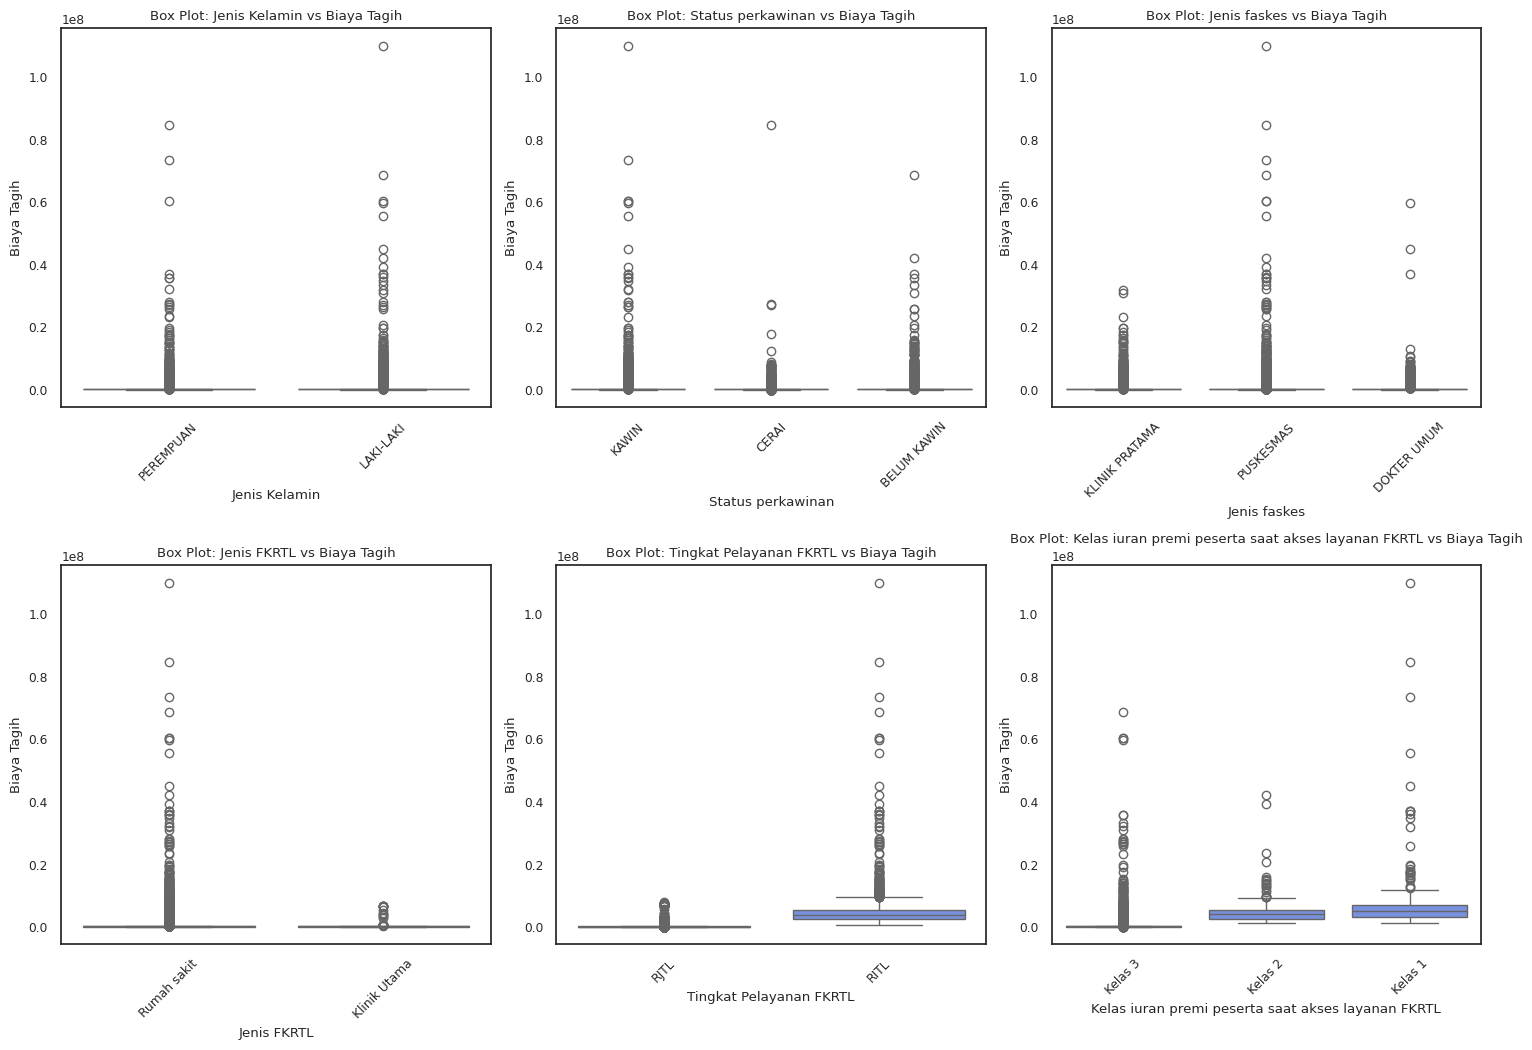

In [ ]:
# Mengidentifikasi variabel kategorikal dengan 2 atau kurang kelompok unik
# After feature engineering, most original categorical columns have been transformed.
# Check if there are any remaining columns with object or category dtype and <= 3 unique values.
categorical_vars_two_groups = [col for col in merged_df.select_dtypes(include=['object', 'category']).columns if merged_df[col].nunique() <= 3]

print("Categorical columns with 2 or fewer unique groups:")
display(categorical_vars_two_groups)

# Since feature engineering has transformed most categorical columns,
# there are likely no columns left with object or category dtype and <= 3 unique values.
# Therefore, skip the plotting part.
if len(categorical_vars_two_groups) == 0:
    print("Tidak ada kolom kategorikal dengan 2 atau kurang grup unik untuk diplot setelah feature engineering.")
else:
    # Define the number of columns for the grid
    n_cols_two_groups = 3 # Adjust as needed

    # Calculate the number of rows needed
    n_rows_two_groups = (len(categorical_vars_two_groups) + n_cols_two_groups - 1) // n_cols_two_groups

    # Create subplots if there are variables to plot
    if n_rows_two_groups > 0:
        fig_two_groups, axes_two_groups = plt.subplots(n_rows_two_groups, n_cols_two_groups, figsize=(15, n_rows_two_groups * 5))
        axes_two_groups = axes_two_groups.flatten() # Flatten the axes array

        # Membuat box plot untuk setiap variabel kategorikal ini terhadap 'Biaya Tagih - oleh fasilitas kesehatan (provider)'
        for i, col in enumerate(categorical_vars_two_groups):
            # Periksa apakah ada cukup titik data di setiap grup untuk box plot yang bermakna
            if merged_df.groupby(col)['Biaya Tagih - oleh fasilitas kesehatan (provider)'].count().min() > 1:
                sns.boxplot(data=merged_df, x=col, y='Biaya Tagih - oleh fasilitas kesehatan (provider)', ax=axes_two_groups[i])
                axes_two_groups[i].set_title(f'Box Plot: {col} vs Biaya Tagih') # Simplified title
                axes_two_groups[i].set_xlabel(col)
                axes_two_groups[i].set_ylabel('Biaya Tagih')
                # Removed unsupported 'ha' argument
                axes_two_groups[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels
            else:
                print(f"Skipping box plot for '{col}' due to insufficient data in one or more groups.")
                fig_two_groups.delaxes(axes_two_groups[i]) # Remove the empty subplot

        # Hide any unused subplots
        for j in range(i + 1, len(axes_two_groups)):
            fig_two_groups.delaxes(axes_two_groups[j])

        plt.tight_layout() # Adjust layout to prevent labels overlapping
        plt.show()
    else:
        print("Tidak ada kolom kategorikal dengan 2 atau kurang grup unik untuk diplot.")

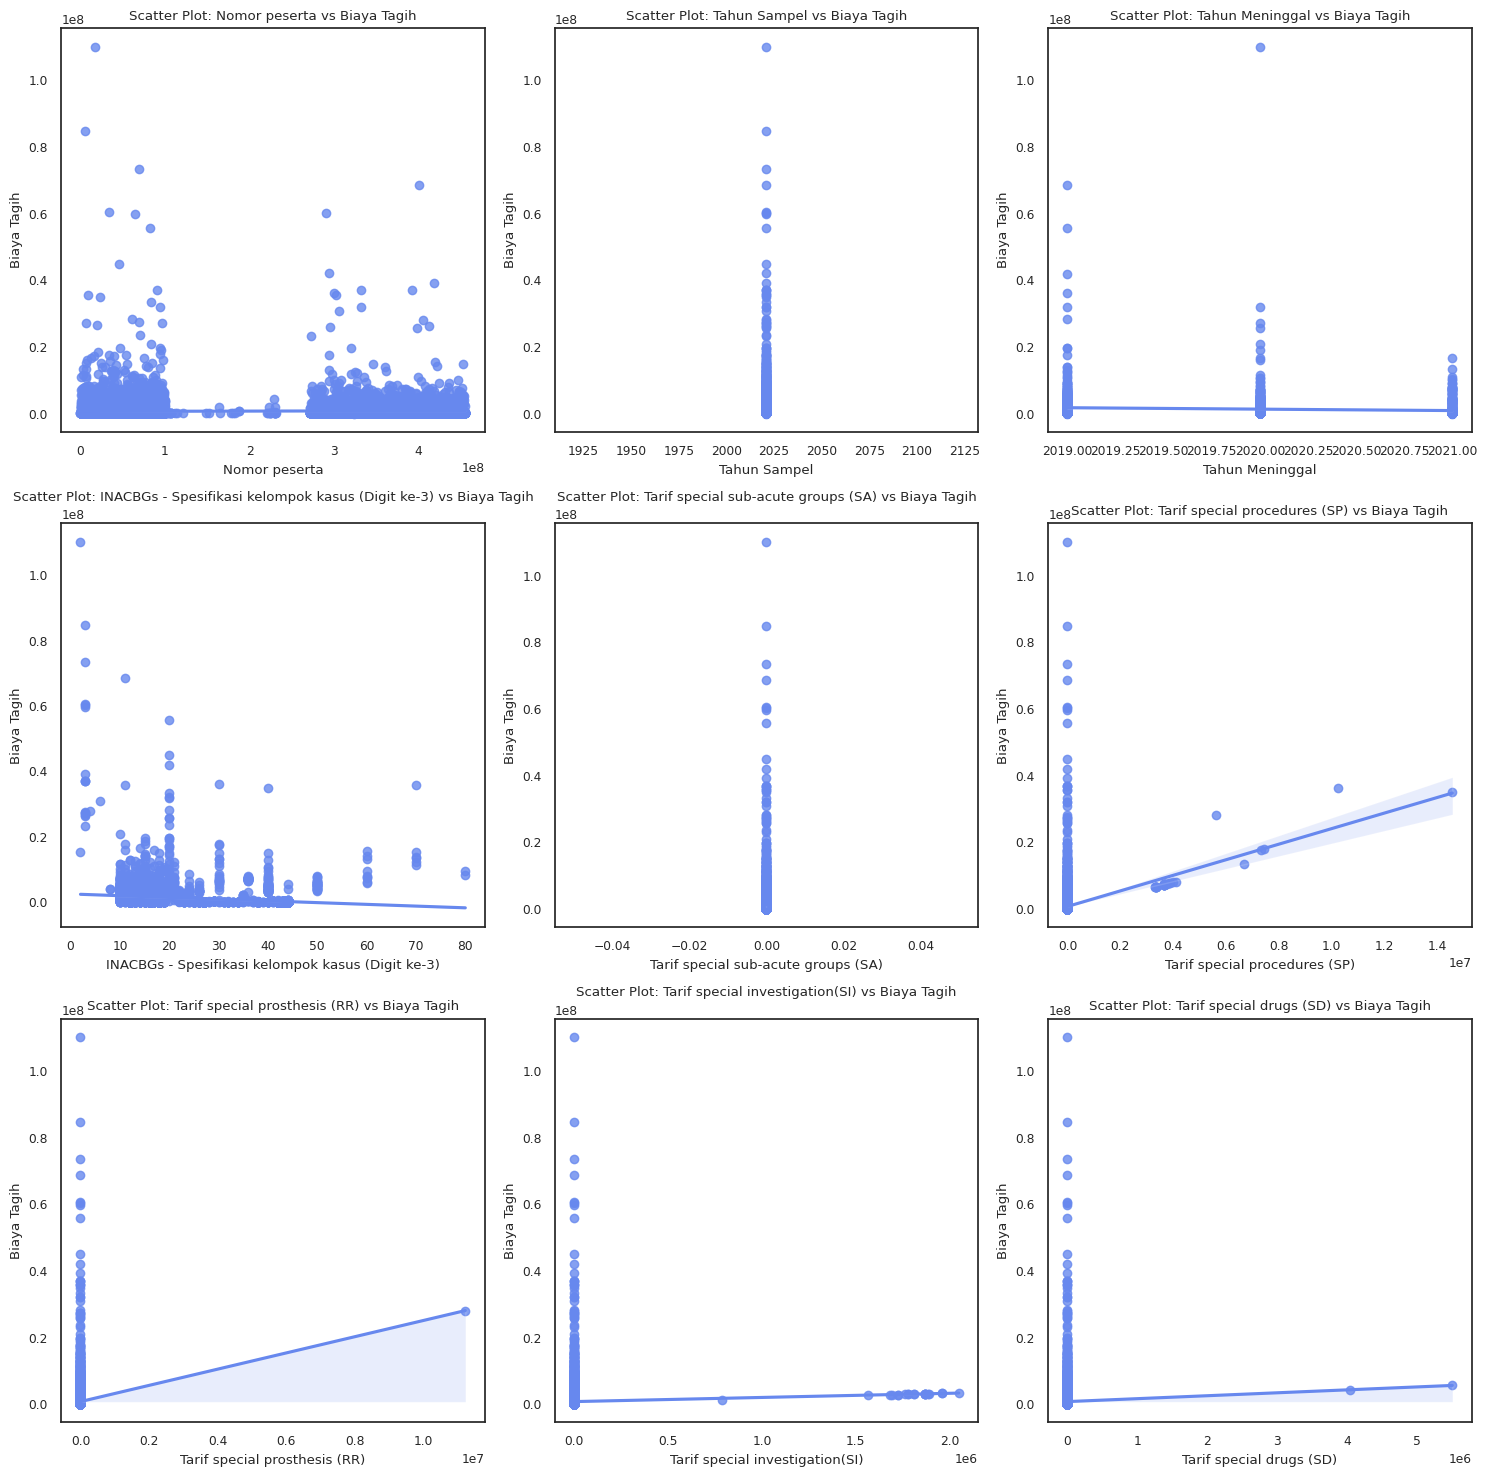

In [ ]:
# Mengidentifikasi variabel numerik
numerical_vars = merged_df.select_dtypes(include=['int64', 'float64']).columns

# Menghapus 'Biaya Tagih - oleh fasilitas kesehatan (provider)' dan 'Biaya Tagih - oleh fasilitas kesehatan (provider)_log1p' dari daftar variabel independen
numerical_vars = numerical_vars.drop(['Biaya Tagih - oleh fasilitas kesehatan (provider)', 'Biaya Tagih - oleh fasilitas kesehatan (provider)_log1p'], errors='ignore')

# Define the number of columns for the grid
n_cols_scatter = 3 # Adjust as needed for better layout
n_rows_scatter = (len(numerical_vars) + n_cols_scatter - 1) // n_cols_scatter

# Create subplots for numerical columns
fig_scatter, axes_scatter = plt.subplots(n_rows_scatter, n_cols_scatter, figsize=(15, n_rows_scatter * 5)) # Adjusted figure size
axes_scatter = axes_scatter.flatten() # Flatten the axes array for easier iteration


# Membuat scatter plot untuk setiap variabel numerik terhadap Biaya Tagih - oleh fasilitas kesehatan (provider)
for i, col in enumerate(numerical_vars):
    sns.regplot(data=merged_df, x=col, y='Biaya Tagih - oleh fasilitas kesehatan (provider)', ax=axes_scatter[i])
    axes_scatter[i].set_title(f'Scatter Plot: {col} vs Biaya Tagih')
    axes_scatter[i].set_xlabel(col)
    axes_scatter[i].set_ylabel('Biaya Tagih')

# Hide any unused subplots
for j in range(i + 1, len(axes_scatter)):
    fig_scatter.delaxes(axes_scatter[j])

plt.tight_layout()
plt.show()

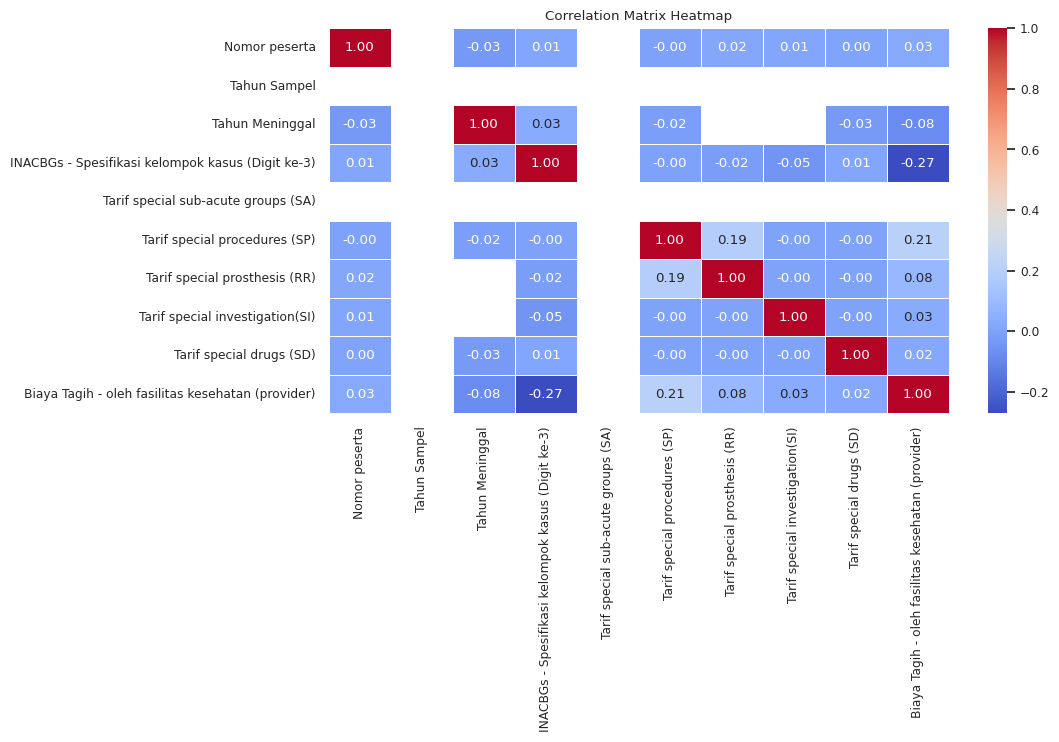

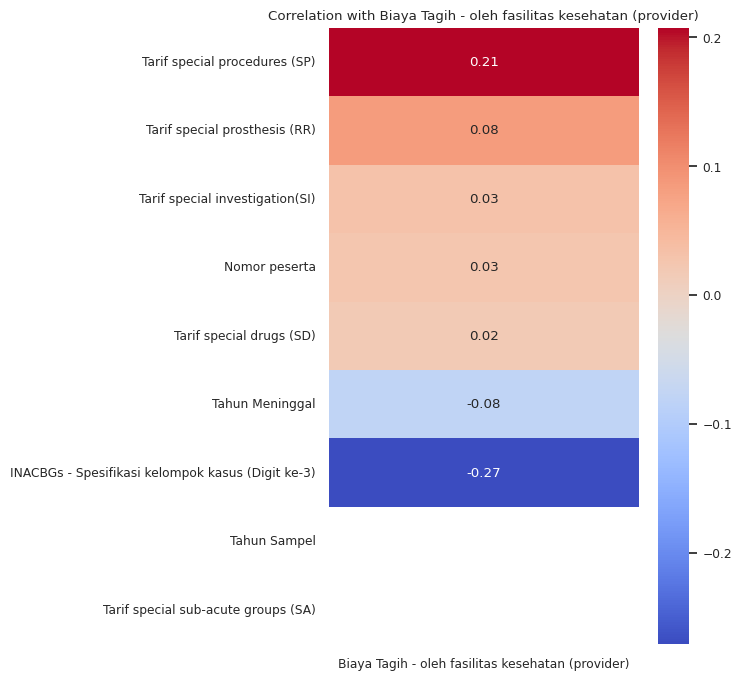

In [ ]:
# Pilih kolom numerik
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
# Hitung matriks korelasi untuk kolom numerik
correlation_matrix = merged_df[numerical_cols].corr()
#Graph I.
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Calculate correlations with the target column 'Biaya Tagih - oleh fasilitas kesehatan (provider)'
target_corr = correlation_matrix[['Biaya Tagih - oleh fasilitas kesehatan (provider)']].drop('Biaya Tagih - oleh fasilitas kesehatan (provider)')
# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(by='Biaya Tagih - oleh fasilitas kesehatan (provider)', ascending=False)
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("coolwarm")
plt.figure(figsize=(5, 8))
sns.heatmap(target_corr_sorted, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation with Biaya Tagih - oleh fasilitas kesehatan (provider)')
plt.show()

## memilih kolom yang memiliki korelasi

**Variabel yang Dapat Digunakan untuk Prediksi:**

Berdasarkan analisis di atas, kolom-kolom yang potensial untuk digunakan dalam memprediksi 'Biaya Tagih - oleh fasilitas kesehatan (provider)' adalah:

* **Variabel Kategorikal dengan Perbedaan Signifikan (dari ANOVA) dan/atau terlihat berbeda pada Box Plot:**
    * INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2) (ANOVA p-value < 0.05)
    * INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4) (ANOVA p-value < 0.05)
    * Kelas iuran premi peserta saat akses layanan FKRTL (ANOVA p-value < 0.05)
    * Deskripsi kode INACBGs (ANOVA p-value < 0.05)
    * Tingkat Pelayanan FKRTL (Box plot shows some difference in median)

* **Variabel Numerik dengan Korelasi Relatif Kuat (dari Heatmap dan Scatter Plot):**
  * Tarif special procedures (SP) (korelasi positif terkuat)
  * INACBGs - Spesifikasi kelompok kasus (Digit ke-3) (korelasi negatif lemah)

* **Fitur Hasil Rekayasa Fitur:**
  * Usia peserta
  * Durasi Kunjungan FKRTL

In [ ]:
# Select only the columns to be used for modeling based on previous analysis
selected_columns_clear = [
       'Tanggal lahir peserta', # Used for feature engineering
       'Tanggal datang kunjungan FKRTL', # Used for feature engineering
       'Tanggal pulang kunjungan FKRTL', # Categorical (ANOVA p<0.05) - Also used for feature engineering
       'Tingkat Pelayanan FKRTL', # Categorical (box plot)
       'Kelas iuran premi peserta saat akses layanan FKRTL', # Categorical (ANOVA p<0.05)
       'Deskripsi kode INACBGs', # Categorical (ANOVA p<0.05)
       'INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)', # Categorical (ANOVA p<0.05)
       'INACBGs - Spesifikasi kelompok kasus (Digit ke-3)', # Numerical (weak negative correlation)
       'INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)', # Categorical (ANOVA p<0.05)
       'Tarif special procedures (SP)', # Numerical (strongest positive correlation)
       'Biaya Tagih - oleh fasilitas kesehatan (provider)', # Target variable
]

# Ensure all selected columns exist in the dataframe
existing_columns_clear = [col for col in selected_columns_clear if col in merged_df.columns]
merged_df = merged_df[existing_columns_clear].copy()

print("Selected columns:")
display(merged_df.columns)
display(merged_df.head())

Selected columns:


Index(['Tanggal lahir peserta', 'Tanggal datang kunjungan FKRTL',
       'Tanggal pulang kunjungan FKRTL', 'Tingkat Pelayanan FKRTL',
       'Kelas iuran premi peserta saat akses layanan FKRTL',
       'Deskripsi kode INACBGs',
       'INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)',
       'INACBGs - Spesifikasi kelompok kasus (Digit ke-3)',
       'INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)',
       'Tarif special procedures (SP)',
       'Biaya Tagih - oleh fasilitas kesehatan (provider)'],
      dtype='object')

,Tanggal lahir peserta,Tanggal datang kunjungan FKRTL,Tanggal pulang kunjungan FKRTL,Tingkat Pelayanan FKRTL,Kelas iuran premi peserta saat akses layanan FKRTL,Deskripsi kode INACBGs,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2),INACBGs - Spesifikasi kelompok kasus (Digit ke-3),INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4),Tarif special procedures (SP),Biaya Tagih - oleh fasilitas kesehatan (provider)
0,1963-05-01,2019-09-28,2019-09-28,RJTL,Kelas 3,PENYAKIT KRONIS KECIL LAIN-LAIN,Rawat Jalan Bukan Prosedur,44,Rawat Jalan,0.0,192700
1,1957-10-13,2015-05-05,2015-05-05,RJTL,Kelas 3,"PROSEDUR LAIN-LAIN PADA TELINGA, HIDUNG, MULUT...",Prosedur Signifikan Rawat Jalan,15,Rawat Jalan,NaN,157700
2,1997-03-21,2019-06-25,2019-06-25,RJTL,Kelas 3,PENYAKIT KRONIS KECIL LAIN-LAIN,Rawat Jalan Bukan Prosedur,44,Rawat Jalan,0.0,183000
3,1962-12-01,2020-01-04,2020-01-04,RJTL,Kelas 3,PENYAKIT KRONIS KECIL LAIN-LAIN,Rawat Jalan Bukan Prosedur,44,Rawat Jalan,0.0,194700
4,1952-01-26,2019-03-28,2019-03-28,RJTL,Kelas 3,KONSULTASI ATAU PEMERIKSAAN LAIN-LAIN,Rawat Jalan Bukan Prosedur,18,Rawat Jalan,0.0,143900


In [ ]:
# Menampilkan tipe data dari setiap kolom di DataFrame
print("Data types of each column:")
display(merged_df.info())

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15832 entries, 0 to 15831
Data columns (total 11 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Tanggal lahir peserta                                        15832 non-null  object 
 1   Tanggal datang kunjungan FKRTL                               15832 non-null  object 
 2   Tanggal pulang kunjungan FKRTL                               15832 non-null  object 
 3   Tingkat Pelayanan FKRTL                                      15832 non-null  object 
 4   Kelas iuran premi peserta saat akses layanan FKRTL           15832 non-null  object 
 5   Deskripsi kode INACBGs                                       15832 non-null  object 
 6   INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)  15832 non-null  object 
 7   INACBGs - Spesifikasi kelompok kasus (Digit ke-3)

None

## mengatasi nilai yang hilang

In [ ]:
# Calculate the number of missing values for each column
missing_values_count = merged_df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_values_percentage = (missing_values_count / len(merged_df)) * 100

# Display the count of missing values
print("Count of missing values per column:")
display(missing_values_count)

# Display the percentage of missing values
print("\nPercentage of missing values per column:")
display(missing_values_percentage)

Count of missing values per column:


,0
Tanggal lahir peserta,0
Tanggal datang kunjungan FKRTL,0
Tanggal pulang kunjungan FKRTL,0
Tingkat Pelayanan FKRTL,0
Kelas iuran premi peserta saat akses layanan FKRTL,0
Deskripsi kode INACBGs,0
INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2),0
INACBGs - Spesifikasi kelompok kasus (Digit ke-3),0
INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4),0
Tarif special procedures (SP),604



Percentage of missing values per column:


,0
Tanggal lahir peserta,0.000000
Tanggal datang kunjungan FKRTL,0.000000
Tanggal pulang kunjungan FKRTL,0.000000
Tingkat Pelayanan FKRTL,0.000000
Kelas iuran premi peserta saat akses layanan FKRTL,0.000000
Deskripsi kode INACBGs,0.000000
INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2),0.000000
INACBGs - Spesifikasi kelompok kasus (Digit ke-3),0.000000
INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4),0.000000
Tarif special procedures (SP),3.815058


In [ ]:
# Impute missing values in 'Tarif special procedures (SP)' with 0
merged_df.fillna({'Tarif special procedures (SP)':0}, inplace=True)

print("Missing values after imputation:")
display(merged_df.isnull().sum())

Missing values after imputation:


,0
Tanggal lahir peserta,0
Tanggal datang kunjungan FKRTL,0
Tanggal pulang kunjungan FKRTL,0
Tingkat Pelayanan FKRTL,0
Kelas iuran premi peserta saat akses layanan FKRTL,0
Deskripsi kode INACBGs,0
INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2),0
INACBGs - Spesifikasi kelompok kasus (Digit ke-3),0
INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4),0
Tarif special procedures (SP),0


## mengatasi outlier

In [ ]:
# Create 'Ada_SP' feature (0/1)
merged_df['Ada_SP'] = (merged_df['Tarif special procedures (SP)'] > 0).astype(int)

# Apply log1p transformation to 'Tarif special procedures (SP)'
merged_df['Tarif special procedures (SP)_log1p'] = np.log1p(merged_df['Tarif special procedures (SP)'])

# Drop the original 'Tarif special procedures (SP)' column
merged_df.drop(columns=['Tarif special procedures (SP)'], inplace=True)

print("Dataframe after creating new features and dropping original column:")
display(merged_df[['Ada_SP', 'Tarif special procedures (SP)_log1p']].head())

Dataframe after creating new features and dropping original column:


,Ada_SP,Tarif special procedures (SP)_log1p
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [ ]:
# Apply log1p transformation to the target variable
merged_df['Biaya Tagih - oleh fasilitas kesehatan (provider)_log1p'] = np.log1p(merged_df['Biaya Tagih - oleh fasilitas kesehatan (provider)'])

print("Dataframe after applying log1p transformation to the target variable:")
display(merged_df[['Biaya Tagih - oleh fasilitas kesehatan (provider)', 'Biaya Tagih - oleh fasilitas kesehatan (provider)_log1p']].head())

Dataframe after applying log1p transformation to the target variable:


,Biaya Tagih - oleh fasilitas kesehatan (provider),Biaya Tagih - oleh fasilitas kesehatan (provider)_log1p
0,192700,12.168895
1,157700,11.968456
2,183000,12.117247
3,194700,12.179220
4,143900,11.876881


## mengubah kolom tanggal menjadi objek datetime

In [ ]:
from datetime import datetime

date_cols_to_convert = ['Tanggal lahir peserta', 'Tanggal datang kunjungan FKRTL', 'Tanggal pulang kunjungan FKRTL']
for col in date_cols_to_convert:
    # Convert to datetime, coercing errors to NaT (Not a Time)
    merged_df[col] = pd.to_datetime(merged_df[col], errors='coerce')

print("Dataframe setelah konversi kolom tanggal:")
display(merged_df[date_cols_to_convert].head())

Dataframe setelah konversi kolom tanggal:


,Tanggal lahir peserta,Tanggal datang kunjungan FKRTL,Tanggal pulang kunjungan FKRTL
0,1963-05-01,2019-09-28,2019-09-28
1,1957-10-13,2015-05-05,2015-05-05
2,1997-03-21,2019-06-25,2019-06-25
3,1962-12-01,2020-01-04,2020-01-04
4,1952-01-26,2019-03-28,2019-03-28


# **Exploratory Data Analysis (EDA)**

## Histogram

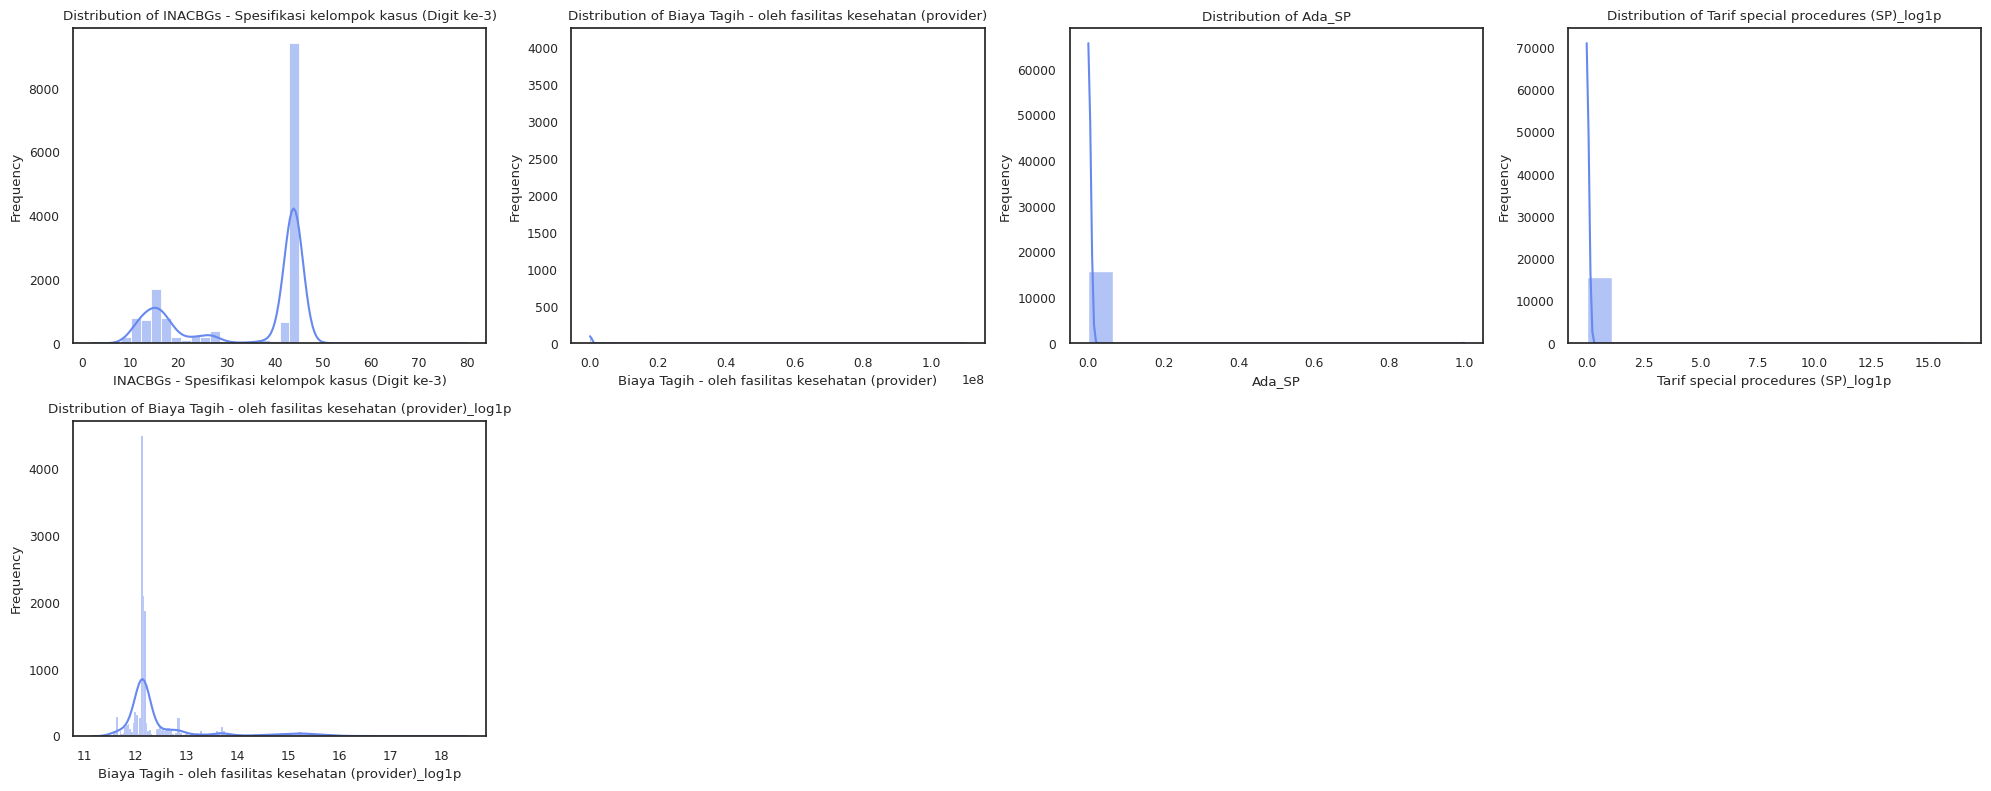

Skipping distribution plot for 'Tanggal lahir peserta' as it is not a numerical or boolean column suitable for plotting.
Skipping distribution plot for 'Tanggal datang kunjungan FKRTL' as it is not a numerical or boolean column suitable for plotting.
Skipping distribution plot for 'Tanggal pulang kunjungan FKRTL' as it is not a numerical or boolean column suitable for plotting.
Skipping distribution plot for 'Tingkat Pelayanan FKRTL' as it is not a numerical or boolean column suitable for plotting.
Skipping distribution plot for 'Kelas iuran premi peserta saat akses layanan FKRTL' as it is not a numerical or boolean column suitable for plotting.
Skipping distribution plot for 'Deskripsi kode INACBGs' as it is not a numerical or boolean column suitable for plotting.
Skipping distribution plot for 'INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)' as it is not a numerical or boolean column suitable for plotting.
Skipping distribution plot for 'INACBGs - Tingkat keparahan kelom

In [ ]:
# Define the number of columns for the grid
n_cols = 4 # Increased number of columns for a more compact view
numerical_cols_to_plot = merged_df.select_dtypes(include=['int64', 'float64']).columns
n_rows_numerical = (len(numerical_cols_to_plot) + n_cols - 1) // n_cols


# Create subplots for numerical columns
fig_numerical, axes_numerical = plt.subplots(n_rows_numerical, n_cols, figsize=(20, n_rows_numerical * 4)) # Adjusted figure size
axes_numerical = axes_numerical.flatten() # Flatten the axes array for easier iteration

# Plot histograms for numerical columns
for i, col in enumerate(numerical_cols_to_plot):
    sns.histplot(data=merged_df, x=col, kde=True, ax=axes_numerical[i])
    axes_numerical[i].set_title(f'Distribution of {col}')
    axes_numerical[i].set_xlabel(col)
    axes_numerical[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes_numerical)):
    fig_numerical.delaxes(axes_numerical[j])

plt.tight_layout()
plt.show()

# Print messages for skipped columns (if any)
for col in merged_df.columns:
    if merged_df[col].dtype not in ['int64', 'float64', 'bool']: # Include boolean as they are results of one-hot encoding
         print(f"Skipping distribution plot for '{col}' as it is not a numerical or boolean column suitable for plotting.")

# **Feature Engineering**

## target Encoding

In [ ]:
column_to_encode = 'Deskripsi kode INACBGs'
target_column = 'Biaya Tagih - oleh fasilitas kesehatan (provider)'

# Calculate value counts for the column
value_counts = merged_df[column_to_encode].value_counts()

# Identify rare categories (e.g., frequency less than 5%)
# You can adjust the threshold (0.05) as needed
rare_categories = value_counts[value_counts / len(merged_df) < 0.05].index

# Apply rare encoding: replace rare categories with a placeholder
merged_df[column_to_encode] = merged_df[column_to_encode].replace(rare_categories, 'Rare')

# Apply Target Encoding with smoothing
# smoothing parameter can be adjusted, higher values mean more smoothing towards the global mean
encoder = TargetEncoder(cols=[column_to_encode], smoothing=1.0) # Adjust smoothing as needed

# Fit and transform the data
# To avoid data leakage, fit the encoder only on the training data if you were doing a train/test split beforehand.
# Since we are doing feature engineering before the split, we fit on the entire data, but be mindful of this
# if you were to apply this in a cross-validation loop for model training.
merged_df[f'{column_to_encode}_rare_target_encoded'] = encoder.fit_transform(
    merged_df[column_to_encode],
    merged_df[target_column]
)

# Drop the original column after encoding
merged_df.drop(columns=[column_to_encode], inplace=True)

# Display the first few rows to show the new column
print(f"Dataframe after applying rare and target encoding to '{column_to_encode}':")
display(merged_df[[f'{column_to_encode}_rare_target_encoded', target_column]].head())

Dataframe after applying rare and target encoding to 'Deskripsi kode INACBGs':


,Deskripsi kode INACBGs_rare_target_encoded,Biaya Tagih - oleh fasilitas kesehatan (provider)
0,1.982635e+05,192700
1,1.481698e+06,157700
2,1.982635e+05,183000
3,1.982635e+05,194700
4,1.481698e+06,143900


## one-hot encoding

In [ ]:
merged_df = pd.get_dummies(merged_df, columns=[
    'Tingkat Pelayanan FKRTL',
    'INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)',
],
                           prefix=[
                              'Tingkat Pelayanan FKRTL',
                              'INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)',
                           ], drop_first=True)

In [ ]:
# Display the first few rows of the one-hot encoded column
kepemilikan_fkrtl_cols = [col for col in merged_df.columns if 'Tingkat Pelayanan FKRTL_' in col]
print("Dataframe after one-hot encoding 'Kepemilikan FKRTL':")
display(merged_df[kepemilikan_fkrtl_cols].head())

Dataframe after one-hot encoding 'Kepemilikan FKRTL':


,Tingkat Pelayanan FKRTL_RJTL
0,True
1,True
2,True
3,True
4,True


## label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
merged_df["Kelas iuran premi peserta saat akses layanan FKRTL"] = le.fit_transform(
    merged_df["Kelas iuran premi peserta saat akses layanan FKRTL"]
)
merged_df["INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)"] = le.fit_transform(
    merged_df["INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)"]
)

## Membuat kolom baru 'usia peserta'

In [ ]:
# Rekayasa fitur 'Usia peserta'
merged_df['Usia peserta'] = merged_df['Tanggal datang kunjungan FKRTL'].dt.year - merged_df['Tanggal lahir peserta'].dt.year

# Drop the original 'Tanggal lahir peserta' column
merged_df.drop(columns=['Tanggal lahir peserta'], inplace=True)

display(merged_df[['Usia peserta']].head())

,Usia peserta
0,56
1,58
2,22
3,58
4,67


## membuat kolom baru 'durasi kunjungan FKRTL'

In [ ]:
# Rekayasa fitur 'Durasi Kunjungan FKRTL'
merged_df['Durasi Kunjungan FKRTL'] = (merged_df['Tanggal pulang kunjungan FKRTL'] - merged_df['Tanggal datang kunjungan FKRTL']).dt.days

# Drop the original date columns
merged_df.drop(columns=['Tanggal datang kunjungan FKRTL', 'Tanggal pulang kunjungan FKRTL'], inplace=True)

display(merged_df[['Durasi Kunjungan FKRTL']].head())

,Durasi Kunjungan FKRTL
0,0
1,0
2,0
3,0
4,0


# **Training and Evaluation**

## seluruh kolom yang digunakan

In [ ]:
display(merged_df.head())

,Kelas iuran premi peserta saat akses layanan FKRTL,INACBGs - Spesifikasi kelompok kasus (Digit ke-3),INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4),Biaya Tagih - oleh fasilitas kesehatan (provider),Ada_SP,Tarif special procedures (SP)_log1p,Biaya Tagih - oleh fasilitas kesehatan (provider)_log1p,Deskripsi kode INACBGs_rare_target_encoded,Tingkat Pelayanan FKRTL_RJTL,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)_Prosedur Besar Rawat Jalan,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)_Prosedur Rawat Inap,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)_Prosedur Signifikan Rawat Jalan,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)_Rawat Inap Bukan Prosedur,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)_Rawat Inap Kebidanan,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)_Rawat Inap Neonatal,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)_Rawat Jalan Bukan Prosedur,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)_Rawat Jalan kebidanan,Usia peserta,Durasi Kunjungan FKRTL
0,2,44,1,192700,0,0.0,12.168895,1.982635e+05,True,False,False,False,False,False,False,True,False,56,0
1,2,15,1,157700,0,0.0,11.968456,1.481698e+06,True,False,False,True,False,False,False,False,False,58,0
2,2,44,1,183000,0,0.0,12.117247,1.982635e+05,True,False,False,False,False,False,False,True,False,22,0
3,2,44,1,194700,0,0.0,12.179220,1.982635e+05,True,False,False,False,False,False,False,True,False,58,0
4,2,18,1,143900,0,0.0,11.876881,1.481698e+06,True,False,False,False,False,False,False,True,False,67,0


## Pembagian data


In [ ]:
# Separate features (X) and target (y)
X = merged_df.drop(['Biaya Tagih - oleh fasilitas kesehatan (provider)','Biaya Tagih - oleh fasilitas kesehatan (provider)_log1p'], axis=1)
y = merged_df['Biaya Tagih - oleh fasilitas kesehatan (provider)_log1p']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (12665, 17)
Shape of X_test: (3167, 17)
Shape of y_train: (12665,)
Shape of y_test: (3167,)


## Pemilihan model


In [ ]:
# Explain the chosen models and why they are suitable:
print("Selected Regression Models and their suitability:")
print("- Linear Regression: A simple and interpretable model that assumes a linear relationship between features and the target. Suitable as a baseline.")
print("- Ridge and Lasso: Regularized linear models that help prevent overfitting by adding penalties to the coefficients. Useful when dealing with multicollinearity or a large number of features.")
print("- Decision Tree Regressor: A non-linear model that splits the data based on feature values. Can capture complex relationships but can be prone to overfitting.")
print("- Random Forest Regressor: An ensemble method that combines multiple decision trees. Reduces overfitting and generally provides better performance than a single decision tree.")
print("- Gradient Boosting Regressor: Another ensemble method that builds trees sequentially, with each tree correcting the errors of the previous ones. Often provides high accuracy.")

# Prepare the models (instantiate them with default parameters for now)
linear_reg_model = LinearRegression()
ridge_model = Ridge(random_state=42)
lasso_model = Lasso(random_state=42)
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

print("\nRegression models instantiated and ready for training.")

Selected Regression Models and their suitability:
- Linear Regression: A simple and interpretable model that assumes a linear relationship between features and the target. Suitable as a baseline.
- Ridge and Lasso: Regularized linear models that help prevent overfitting by adding penalties to the coefficients. Useful when dealing with multicollinearity or a large number of features.
- Decision Tree Regressor: A non-linear model that splits the data based on feature values. Can capture complex relationships but can be prone to overfitting.
- Random Forest Regressor: An ensemble method that combines multiple decision trees. Reduces overfitting and generally provides better performance than a single decision tree.
- Gradient Boosting Regressor: Another ensemble method that builds trees sequentially, with each tree correcting the errors of the previous ones. Often provides high accuracy.

Regression models instantiated and ready for training.


## Pelatihan model


In [ ]:
# Train the Linear Regression model
linear_reg_model.fit(X_train, y_train)
print("Linear Regression model trained.")

# Train the Ridge model
ridge_model.fit(X_train, y_train)
print("Ridge model trained.")

# Train the Lasso model
lasso_model.fit(X_train, y_train)
print("Lasso model trained.")

# Train the Decision Tree Regressor model
decision_tree_model.fit(X_train, y_train)
print("Decision Tree Regressor model trained.")

# Train the Random Forest Regressor model
random_forest_model.fit(X_train, y_train)
print("Random Forest Regressor model trained.")

# Train the Gradient Boosting Regressor model
gradient_boosting_model.fit(X_train, y_train)
print("Gradient Boosting Regressor model trained.")

Linear Regression model trained.
Ridge model trained.
Lasso model trained.
Decision Tree Regressor model trained.
Random Forest Regressor model trained.
Gradient Boosting Regressor model trained.


## Evaluasi model


In [ ]:
# Dictionary to store evaluation results
evaluation_results = {}

# List of trained models
models = {
    "Linear Regression": linear_reg_model,
    "Ridge": ridge_model,
    "Lasso": lasso_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": gradient_boosting_model
}

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...")
    start_time = time.time() # Start time

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    end_time = time.time() # End time
    execution_time = end_time - start_time

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)

    # Store the results
    evaluation_results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2,
        "Execution Time (s)": execution_time # Store execution time
    }

    # Print the evaluation results for the current model
    print(f"Evaluation results for {name}:")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R-squared (R2): {r2:.4f}")
    print(f"  Execution Time: {execution_time:.4f} seconds") # Print execution time
    print("-" * 30)

Evaluating Linear Regression...
Evaluation results for Linear Regression:
  Mean Absolute Error (MAE): 0.2416
  Mean Squared Error (MSE): 0.1684
  Root Mean Squared Error (RMSE): 0.4104
  R-squared (R2): 0.8170
  Execution Time: 0.0142 seconds
------------------------------
Evaluating Ridge...
Evaluation results for Ridge:
  Mean Absolute Error (MAE): 0.2419
  Mean Squared Error (MSE): 0.1682
  Root Mean Squared Error (RMSE): 0.4102
  R-squared (R2): 0.8172
  Execution Time: 0.1196 seconds
------------------------------
Evaluating Lasso...
Evaluation results for Lasso:
  Mean Absolute Error (MAE): 0.4822
  Mean Squared Error (MSE): 0.6443
  Root Mean Squared Error (RMSE): 0.8027
  R-squared (R2): 0.3000
  Execution Time: 0.1218 seconds
------------------------------
Evaluating Decision Tree...
Evaluation results for Decision Tree:
  Mean Absolute Error (MAE): 0.1504
  Mean Squared Error (MSE): 0.0923
  Root Mean Squared Error (RMSE): 0.3038
  R-squared (R2): 0.8998
  Execution Time: 0.

## K-Fold Cross-Validation

In [ ]:
# Define the number of folds for cross-validation
n_splits = 5 # You can adjust the number of folds

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Dictionary to store cross-validation results for each model
cv_results = {}

# List of trained models (using the instantiated models from the previous evaluation cell)
models = {
    "Linear Regression": linear_reg_model,
    "Ridge": ridge_model,
    "Lasso": lasso_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": gradient_boosting_model
}

# Perform k-fold cross-validation for each model
for name, model in models.items():
    print(f"Performing {n_splits}-fold cross-validation for {name}...")

    # Lists to store metrics for each fold
    mae_scores = []
    mse_scores = []
    rmse_scores = []
    r2_scores = []
    fold_execution_times = [] # List to store execution time for each fold


    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
        start_time = time.time() # Start time for the fold

        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Train the model on the training fold
        model.fit(X_train_fold, y_train_fold)

        # Make predictions on the test fold
        y_pred_fold = model.predict(X_test_fold)

        end_time = time.time() # End time for the fold
        fold_execution_times.append(end_time - start_time) # Store execution time for the fold


        # Calculate evaluation metrics for the fold
        mae_scores.append(mean_absolute_error(y_test_fold, y_pred_fold))
        mse_scores.append(mean_squared_error(y_test_fold, y_pred_fold))
        rmse_scores.append(np.sqrt(mean_squared_error(y_test_fold, y_pred_fold)))
        r2_scores.append(r2_score(y_test_fold, y_pred_fold))


    # Calculate the average metrics across all folds
    cv_results[name] = {
        "Average MAE": np.mean(mae_scores),
        "Average MSE": np.mean(mse_scores),
        "Average RMSE": np.mean(rmse_scores),
        "Average R-squared": np.mean(r2_scores),
        "Average Execution Time (s)": np.mean(fold_execution_times) # Store average execution time

    }

    print(f"Completed cross-validation for {name}.")
    print("-" * 30)

# Display the average cross-validation results
print("\nAverage Cross-Validation Results:")
for name, metrics in cv_results.items():
    print(f"\nModel: {name}")
    print(f"  Average MAE: {metrics['Average MAE']:.4f}")
    print(f"  Average MSE: {metrics['Average MSE']:.4f}")
    print(f"  Average RMSE: {metrics['Average RMSE']:.4f}")
    print(f"  Average R-squared: {metrics['Average R-squared']:.4f}")
    print(f"  Average Execution Time: {metrics['Average Execution Time (s)']:.4f} seconds") # Print average execution time

Performing 5-fold cross-validation for Linear Regression...
Completed cross-validation for Linear Regression.
------------------------------
Performing 5-fold cross-validation for Ridge...
Completed cross-validation for Ridge.
------------------------------
Performing 5-fold cross-validation for Lasso...
Completed cross-validation for Lasso.
------------------------------
Performing 5-fold cross-validation for Decision Tree...
Completed cross-validation for Decision Tree.
------------------------------
Performing 5-fold cross-validation for Random Forest...
Completed cross-validation for Random Forest.
------------------------------
Performing 5-fold cross-validation for Gradient Boosting...
Completed cross-validation for Gradient Boosting.
------------------------------

Average Cross-Validation Results:

Model: Linear Regression
  Average MAE: 0.2474
  Average MSE: 0.1739
  Average RMSE: 0.4170
  Average R-squared: 0.8284
  Average Execution Time: 0.0758 seconds

Model: Ridge
  Avera

## Pemilihan model terbaik


In [ ]:
# Analyze the evaluation results to identify the best model
best_model_name = None
best_r2 = -float('inf') # Initialize with negative infinity

print("Analyzing model evaluation results:")

for model_name, metrics in evaluation_results.items():
    print(f"\nModel: {model_name}")
    print(f"  R-squared: {metrics['R-squared']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print(f"  Execution Time: {metrics['Execution Time (s)']:.4f} seconds") # Display execution time


    # Check if the current model has a higher R-squared than the current best
    if metrics['R-squared'] > best_r2:
        best_r2 = metrics['R-squared']
        best_model_name = model_name

print(f"\nBased on R-squared, the best performing model is: {best_model_name}")

# You can also consider MAE or RMSE for selecting the best model, as lower values are better.
# For example, to find the model with the lowest MAE:
best_mae = float('inf')
best_model_mae = None

for model_name, metrics in evaluation_results.items():
    if metrics['MAE'] < best_mae:
        best_mae = metrics['MAE']
        best_model_mae = model_name

print(f"Based on Mean Absolute Error (MAE), the best performing model is: {best_model_mae}")

# For example, to find the model with the lowest RMSE:
best_rmse = float('inf')
best_model_rmse = None

for model_name, metrics in evaluation_results.items():
    if metrics['RMSE'] < best_rmse:
        best_rmse = metrics['RMSE']
        best_model_rmse = model_name

print(f"Based on Root Mean Squared Error (RMSE), the best performing model is: {best_model_rmse}")

Analyzing model evaluation results:

Model: Linear Regression
  R-squared: 0.8170
  MAE: 0.2416
  RMSE: 0.4104
  Execution Time: 0.0142 seconds

Model: Ridge
  R-squared: 0.8172
  MAE: 0.2419
  RMSE: 0.4102
  Execution Time: 0.1196 seconds

Model: Lasso
  R-squared: 0.3000
  MAE: 0.4822
  RMSE: 0.8027
  Execution Time: 0.1218 seconds

Model: Decision Tree
  R-squared: 0.8998
  MAE: 0.1504
  RMSE: 0.3038
  Execution Time: 0.0378 seconds

Model: Random Forest
  R-squared: 0.9130
  MAE: 0.1431
  RMSE: 0.2829
  Execution Time: 1.8730 seconds

Model: Gradient Boosting
  R-squared: 0.9032
  MAE: 0.1669
  RMSE: 0.2986
  Execution Time: 1.0688 seconds

Based on R-squared, the best performing model is: Random Forest
Based on Mean Absolute Error (MAE), the best performing model is: Random Forest
Based on Root Mean Squared Error (RMSE), the best performing model is: Random Forest


## Pemilihan model terbaik K-Fold Cross-Validation

In [ ]:
# Analyze the average cross-validation results to identify the best model
best_model_name_cv = None
best_r2_cv = -float('inf') # Initialize with negative infinity

print("Analyzing average cross-validation results:")

for model_name, metrics in cv_results.items():
    print(f"\nModel: {model_name}")
    print(f"  Average R-squared: {metrics['Average R-squared']:.4f}")
    print(f"  Average MAE: {metrics['Average MAE']:.4f}")
    print(f"  Average RMSE: {metrics['Average RMSE']:.4f}")
    print(f"  Average Execution Time: {metrics['Average Execution Time (s)']:.4f} seconds") # Print average execution time


    # Check if the current model has a higher average R-squared than the current best
    if metrics['Average R-squared'] > best_r2_cv:
        best_r2_cv = metrics['Average R-squared']
        best_model_name_cv = model_name

print(f"\nBased on Average R-squared from cross-validation, the best performing model is: {best_model_name_cv}")

# You can also consider Average MAE or Average RMSE for selecting the best model, as lower values are better.
# For example, to find the model with the lowest Average MAE:
best_mae_cv = float('inf')
best_model_mae_cv = None

for model_name, metrics in cv_results.items():
    if metrics['Average MAE'] < best_mae_cv:
        best_mae_cv = metrics['Average MAE']
        best_model_mae_cv = model_name

print(f"Based on Average Mean Absolute Error (MAE) from cross-validation, the best performing model is: {best_model_mae_cv}")

# For example, to find the model with the lowest Average RMSE:
best_rmse_cv = float('inf')
best_model_rmse_cv = None

for model_name, metrics in cv_results.items():
    if metrics['Average RMSE'] < best_rmse_cv:
        best_rmse_cv = metrics['Average RMSE']
        best_model_rmse_cv = model_name

print(f"Based on Average Root Mean Squared Error (RMSE) from cross-validation, the best performing model is: {best_model_rmse_cv}")

Analyzing average cross-validation results:

Model: Linear Regression
  Average R-squared: 0.8284
  Average MAE: 0.2474
  Average RMSE: 0.4170
  Average Execution Time: 0.0758 seconds

Model: Ridge
  Average R-squared: 0.8279
  Average MAE: 0.2480
  Average RMSE: 0.4176
  Average Execution Time: 0.0943 seconds

Model: Lasso
  Average R-squared: 0.2809
  Average MAE: 0.5192
  Average RMSE: 0.8543
  Average Execution Time: 0.0516 seconds

Model: Decision Tree
  Average R-squared: 0.9084
  Average MAE: 0.1545
  Average RMSE: 0.3044
  Average Execution Time: 0.0530 seconds

Model: Random Forest
  Average R-squared: 0.9213
  Average MAE: 0.1459
  Average RMSE: 0.2821
  Average Execution Time: 1.4978 seconds

Model: Gradient Boosting
  Average R-squared: 0.9121
  Average MAE: 0.1699
  Average RMSE: 0.2984
  Average Execution Time: 0.6799 seconds

Based on Average R-squared from cross-validation, the best performing model is: Random Forest
Based on Average Mean Absolute Error (MAE) from cross

## Visualisasi Hasil Prediksi vs Aktual

Comparison of Actual and Predicted values on the test set (Original Scale):


,Actual (Original Scale),Predicted (Original Scale)
12584,298000.0,178434.049377
169,194700.0,199049.579473
2099,184900.0,193257.492493
13186,192100.0,190858.698936
5770,183000.0,193257.492493


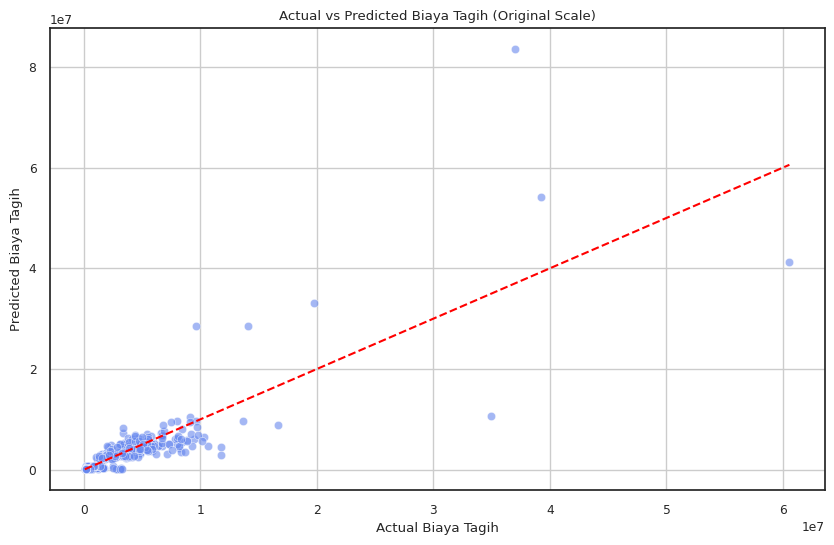

In [ ]:
# Inverse transform the actual test values back to the original scale
y_test_original_scale = np.expm1(y_test)

# Inverse transform the predicted test values back to the original scale
y_pred_original_scale = np.expm1(y_pred)

# Create a DataFrame to compare actual and predicted values on the original scale
comparison_df_original_scale = pd.DataFrame({
    'Actual (Original Scale)': y_test_original_scale,
    'Predicted (Original Scale)': y_pred_original_scale
})

print("Comparison of Actual and Predicted values on the test set (Original Scale):")
display(comparison_df_original_scale.head())

# Visualize the comparison on the original scale
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual (Original Scale)', y='Predicted (Original Scale)', data=comparison_df_original_scale, alpha=0.6)
plt.title('Actual vs Predicted Biaya Tagih (Original Scale)')
plt.xlabel('Actual Biaya Tagih')
plt.ylabel('Predicted Biaya Tagih')
# Add a diagonal line for perfect prediction
plt.plot([min(y_test_original_scale), max(y_test_original_scale)], [min(y_test_original_scale), max(y_test_original_scale)], color='red', linestyle='--')
plt.grid(True)
plt.show()

# **Pemanfaatan Model untuk Memprediksi Data mentah**

## latih model dengan keseluruhan dataset

In [ ]:
#Pilih fitur utk regresi
x_final = merged_df.drop(['Biaya Tagih - oleh fasilitas kesehatan (provider)','Biaya Tagih - oleh fasilitas kesehatan (provider)_log1p',], axis=1)
y_final = merged_df['Biaya Tagih - oleh fasilitas kesehatan (provider)_log1p']

# final Train
final_lm = RandomForestRegressor(random_state=42) # Use the best performing model
final_lm.fit(x_final, y_final) #training the algorithm

# Lakukan prediksi pada data testing
y_pred = final_lm.predict(X_test)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual (log1p)': y_test, 'Predicted (log1p)': y_pred})

print("Comparison of Actual and Predicted values on the test set (log1p transformed):")
display(comparison_df.head())

Comparison of Actual and Predicted values on the test set (log1p transformed):


,Actual (log1p),Predicted (log1p)
12584,12.604852,11.926397
169,12.179220,12.189847
2099,12.127576,12.169068
13186,12.165777,12.122551
5770,12.117247,12.169068


## simpan model yang sudah di latih

In [ ]:
# Define the filename for the saved model
model_filename = 'random_forest_model.pkl'

# Save the trained model to the file
joblib.dump(final_lm, model_filename)

print(f"Trained model saved to {model_filename}")

Trained model saved to random_forest_model.pkl


## muat model yang sudah disimpan

In [ ]:
# Define the filename of the saved model
model_filename = 'random_forest_model.pkl'

# Load the trained model from the file
loaded_model = joblib.load(model_filename)

print(f"Trained model loaded from {model_filename}")

Trained model loaded from random_forest_model.pkl


## Memuat dan Menggabungkan Data Mentah Baru

In [ ]:
# Load new raw data from the specified path
# Assuming the filenames are the same as the original ones but represent new data
try:
    new_kepesertaan_df = pd.read_csv('/content/drive/MyDrive/UTS Machine Learning/data_baru_tb_kepesertaan.csv')
    new_fkrtl_df = pd.read_csv('/content/drive/MyDrive/UTS Machine Learning/data_baru_tb_fkrtl.csv')
    print("New raw data loaded successfully.")
except FileNotFoundError:
    print("Error: Make sure the files 'data_baru_tb_kepesertaan.csv' and 'data_baru_tb_fkrtl.csv' exist in the specified path.")
    # Exit the process if files are not found to avoid further errors
    raise # Re-raise the exception to stop execution


# Rename columns in the new dataframes using the same mappings
new_kepesertaan_df = new_kepesertaan_df.rename(columns=kepesertaan_column_map)
new_fkrtl_df = new_fkrtl_df.rename(columns=fkrtl_column_map)

print("Columns in new dataframes renamed.")

# Identify common columns for merging (excluding Unnamed: 0 as it's an index artifact)
common_cols_new = new_kepesertaan_df.columns.intersection(new_fkrtl_df.columns).drop('Unnamed: 0', errors='ignore')
print(f"Common columns for merging: {list(common_cols_new)}")

# Merge the two new dataframes based on the common columns
# Using an inner merge to keep only rows with matching data in both files
merged_new_data_df = pd.merge(new_kepesertaan_df, new_fkrtl_df, on=list(common_cols_new), how='inner')

print("\nNew raw data merged successfully.")

# Select only the columns to be used for prediction and the target based on the training data
selected_columns_for_prediction_and_target = [
       'Tanggal lahir peserta',
       'Tanggal datang kunjungan FKRTL',
       'Tanggal pulang kunjungan FKRTL',
       'Tingkat Pelayanan FKRTL',
       'Kelas iuran premi peserta saat akses layanan FKRTL',
       'Deskripsi kode INACBGs',
       'INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)',
       'INACBGs - Spesifikasi kelompok kasus (Digit ke-3)',
       'INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)',
       'Tarif special procedures (SP)',
       'Biaya Tagih - oleh fasilitas kesehatan (provider)' # Include the target variable
]

# Ensure all selected columns exist in the merged new data
existing_columns_new_data = [col for col in selected_columns_for_prediction_and_target if col in merged_new_data_df.columns]
merged_new_data_df = merged_new_data_df[existing_columns_new_data].copy()


print("Merged new data preview after column selection:")
display(merged_new_data_df.head())

New raw data loaded successfully.
Columns in new dataframes renamed.
Common columns for merging: ['Nomor peserta', 'Nomor keluarga', 'Bobot']

New raw data merged successfully.
Merged new data preview after column selection:


,Tanggal lahir peserta,Tanggal datang kunjungan FKRTL,Tanggal pulang kunjungan FKRTL,Tingkat Pelayanan FKRTL,Kelas iuran premi peserta saat akses layanan FKRTL,Deskripsi kode INACBGs,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2),INACBGs - Spesifikasi kelompok kasus (Digit ke-3),INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4),Tarif special procedures (SP),Biaya Tagih - oleh fasilitas kesehatan (provider)
0,1984-09-03,2019-11-26,2019-11-26,RJTL,Kelas 3,PENYAKIT KRONIS KECIL LAIN-LAIN,Rawat Jalan Bukan Prosedur,44,Rawat Jalan,0.0,183300
1,2001-03-18,2019-05-17,2019-05-17,RJTL,Kelas 3,PEMERIKSAAN ANTEPARTUM,Rawat Jalan Bukan Prosedur,23,Rawat Jalan,0.0,130600
2,1949-11-02,2018-12-11,2018-12-11,RJTL,Kelas 3,PENYAKIT KRONIS KECIL LAIN-LAIN,Rawat Jalan Bukan Prosedur,44,Rawat Jalan,0.0,183300
3,1977-04-13,2021-08-19,2021-08-19,RJTL,Kelas 3,PENYAKIT KRONIS KECIL LAIN-LAIN,Rawat Jalan Bukan Prosedur,44,Rawat Jalan,0.0,183500
4,1978-03-02,2019-01-18,2019-01-18,RJTL,Kelas 3,PENYAKIT KRONIS KECIL LAIN-LAIN,Rawat Jalan Bukan Prosedur,44,Rawat Jalan,0.0,183300


## Praproses data mentah baru untuk prediksi

In [ ]:
# Convert date columns to datetime objects
date_cols_to_convert_new = ['Tanggal lahir peserta', 'Tanggal datang kunjungan FKRTL', 'Tanggal pulang kunjungan FKRTL']
for col in date_cols_to_convert_new:
    merged_new_data_df[col] = pd.to_datetime(merged_new_data_df[col], errors='coerce')

# Create 'Usia peserta' feature
merged_new_data_df['Usia peserta'] = merged_new_data_df['Tanggal datang kunjungan FKRTL'].dt.year - merged_new_data_df['Tanggal lahir peserta'].dt.year

# Create 'Durasi Kunjungan FKRTL' feature
merged_new_data_df['Durasi Kunjungan FKRTL'] = (merged_new_data_df['Tanggal pulang kunjungan FKRTL'] - merged_new_data_df['Tanggal datang kunjungan FKRTL']).dt.days

# Drop the original date columns
merged_new_data_df.drop(columns=['Tanggal lahir peserta', 'Tanggal datang kunjungan FKRTL', 'Tanggal pulang kunjungan FKRTL'], inplace=True)

# Impute missing values in 'Tarif special procedures (SP)' with 0
merged_new_data_df.fillna({'Tarif special procedures (SP)': 0}, inplace=True)

# Create 'Ada_SP' feature (0/1)
merged_new_data_df['Ada_SP'] = (merged_new_data_df['Tarif special procedures (SP)'] > 0).astype(int)

# Apply log1p transformation to 'Tarif special procedures (SP)'
merged_new_data_df['Tarif special procedures (SP)_log1p'] = np.log1p(merged_new_data_df['Tarif special procedures (SP)'])

# Drop the original 'Tarif special procedures (SP)' column
merged_new_data_df.drop(columns=['Tarif special procedures (SP)'], inplace=True)

# Apply rare encoding to 'Deskripsi kode INACBGs' using the same rare categories as in training
# Ensure 'Rare' category exists in the new data or handle it
merged_new_data_df['Deskripsi kode INACBGs'] = merged_new_data_df['Deskripsi kode INACBGs'].replace(rare_categories, 'Rare')
# Handle any categories in new data that were not in training data and are not 'Rare'
new_categories_not_in_rare = merged_new_data_df['Deskripsi kode INACBGs'][~merged_new_data_df['Deskripsi kode INACBGs'].isin(encoder.mapping[column_to_encode].index) & (merged_new_data_df['Deskripsi kode INACBGs'] != 'Rare')].unique()
if len(new_categories_not_in_rare) > 0:
    print(f"Warning: Found new categories in 'Deskripsi kode INACBGs' not in training data: {new_categories_not_in_rare}. These will be treated as NaN by the encoder.")


# Apply Target Encoding with the fitted encoder from training
# Note: The encoder assumes categories seen during fit. New categories will be imputed with the global mean.
merged_new_data_df[f'{column_to_encode}_rare_target_encoded'] = encoder.transform(merged_new_data_df[column_to_encode])

# Drop the original 'Deskripsi kode INACBGs' column
merged_new_data_df.drop(columns=[column_to_encode], inplace=True)


# Apply one-hot encoding to categorical columns
merged_new_data_df = pd.get_dummies(merged_new_data_df, columns=[
    'Tingkat Pelayanan FKRTL',
    'INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)',
],
                           prefix=[
                              'Tingkat Pelayanan FKRTL',
                              'INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)',
                           ], drop_first=True)

# apply label encoding to categorical columns
from sklearn.preprocessing import LabelEncoder

# Reapply label encoding for 'Kelas iuran premi peserta saat akses layanan FKRTL'
le = LabelEncoder()
merged_new_data_df["Kelas iuran premi peserta saat akses layanan FKRTL"] = le.fit_transform(
    merged_new_data_df["Kelas iuran premi peserta saat akses layanan FKRTL"]
)
# Reapply label encoding for 'INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)'
merged_new_data_df["INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)"] = le.fit_transform(
    merged_new_data_df["INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)"]
)


# Apply log1p transformation to the target variable in the new data
merged_new_data_df['Biaya Tagih - oleh fasilitas kesehatan (provider)_log1p'] = np.log1p(merged_new_data_df['Biaya Tagih - oleh fasilitas kesehatan (provider)'])

# Check data types after encoding
print("\nData types after preprocessing and encoding:")
display(merged_new_data_df.info())

print("\nNew raw data after preprocessing:")
display(merged_new_data_df.head())


Data types after preprocessing and encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Kelas iuran premi peserta saat akses layanan FKRTL                                      10 non-null     int64  
 1   INACBGs - Spesifikasi kelompok kasus (Digit ke-3)                                       10 non-null     int64  
 2   INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)                                  10 non-null     int64  
 3   Biaya Tagih - oleh fasilitas kesehatan (provider)                                       10 non-null     int64  
 4   Usia peserta                                                                            10 non-null     int32  
 5   Durasi Kunjungan FKRTL      

None


New raw data after preprocessing:


,Kelas iuran premi peserta saat akses layanan FKRTL,INACBGs - Spesifikasi kelompok kasus (Digit ke-3),INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4),Biaya Tagih - oleh fasilitas kesehatan (provider),Usia peserta,Durasi Kunjungan FKRTL,Ada_SP,Tarif special procedures (SP)_log1p,Deskripsi kode INACBGs_rare_target_encoded,Tingkat Pelayanan FKRTL_RJTL,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)_Rawat Inap Bukan Prosedur,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)_Rawat Jalan Bukan Prosedur,Biaya Tagih - oleh fasilitas kesehatan (provider)_log1p
0,1,44,0,183300,35,0,0,0.0,1.982635e+05,True,False,True,12.118885
1,1,23,0,130600,18,0,0,0.0,1.481698e+06,True,False,True,11.779902
2,1,44,0,183300,69,0,0,0.0,1.982635e+05,True,False,True,12.118885
3,1,44,0,183500,44,0,0,0.0,1.982635e+05,True,False,True,12.119975
4,1,44,0,183300,41,0,0,0.0,1.982635e+05,True,False,True,12.118885


## Gunakan model untuk memprediksi biaya tagih

Aligned new data preview before prediction:


,Kelas iuran premi peserta saat akses layanan FKRTL,INACBGs - Spesifikasi kelompok kasus (Digit ke-3),INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4),Ada_SP,Tarif special procedures (SP)_log1p,Deskripsi kode INACBGs_rare_target_encoded,Tingkat Pelayanan FKRTL_RJTL,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)_Prosedur Besar Rawat Jalan,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)_Prosedur Rawat Inap,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)_Prosedur Signifikan Rawat Jalan,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)_Rawat Inap Bukan Prosedur,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)_Rawat Inap Kebidanan,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)_Rawat Inap Neonatal,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)_Rawat Jalan Bukan Prosedur,INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)_Rawat Jalan kebidanan,Usia peserta,Durasi Kunjungan FKRTL
0,1,44,0,0,0.0,1.982635e+05,True,0,0,0,False,0,0,True,0,35,0
1,1,23,0,0,0.0,1.481698e+06,True,0,0,0,False,0,0,True,0,18,0
2,1,44,0,0,0.0,1.982635e+05,True,0,0,0,False,0,0,True,0,69,0
3,1,44,0,0,0.0,1.982635e+05,True,0,0,0,False,0,0,True,0,44,0
4,1,44,0,0,0.0,1.982635e+05,True,0,0,0,False,0,0,True,0,41,0
5,0,15,1,0,0.0,1.481698e+06,False,0,0,0,True,0,0,False,0,54,9
6,1,12,0,0,0.0,1.481698e+06,True,0,0,0,False,0,0,False,0,36,0
7,1,16,0,0,0.0,1.481698e+06,True,0,0,0,False,0,0,False,0,56,0
8,1,44,0,0,0.0,1.982635e+05,True,0,0,0,False,0,0,True,0,3,0
9,1,43,0,0,0.0,1.481698e+06,True,0,0,0,False,0,0,True,0,18,0



Comparison of Actual and Predicted values on the new data (Original Scale), with values in Rupiah:


,"Actual (New Data, Rupiah)","Predicted (New Data, Rupiah)"
0,"Rp 183.300,00","Rp 196.570,03"
1,"Rp 130.600,00","Rp 125.378,09"
2,"Rp 183.300,00","Rp 193.697,32"
3,"Rp 183.500,00","Rp 194.631,26"
4,"Rp 183.300,00","Rp 199.468,49"
5,"Rp 5.965.000,00","Rp 7.900.323,90"
6,"Rp 241.900,00","Rp 182.446,38"
7,"Rp 113.100,00","Rp 143.224,42"
8,"Rp 183.000,00","Rp 198.025,03"
9,"Rp 275.100,00","Rp 273.079,80"


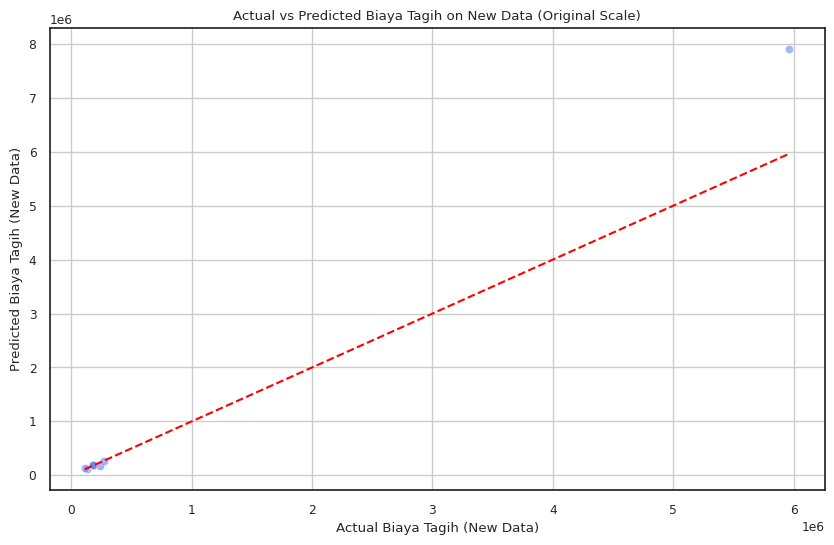


Evaluation results on the new data (Original Scale):
  Mean Absolute Error (MAE): 209.813,62
  Mean Squared Error (MSE): 375.084.745.232,82
  Root Mean Squared Error (RMSE): 612.441,63
  R-squared (R2): 0.8753


In [ ]:
# Separate features (X_new) and target (y_new_actual) from the preprocessed new data
# Exclude the log-transformed target for prediction
X_new = merged_new_data_df.drop(['Biaya Tagih - oleh fasilitas kesehatan (provider)', 'Biaya Tagih - oleh fasilitas kesehatan (provider)_log1p'], axis=1)
y_new_actual_log1p = merged_new_data_df['Biaya Tagih - oleh fasilitas kesehatan (provider)_log1p']
y_new_actual_original_scale = merged_new_data_df['Biaya Tagih - oleh fasilitas kesehatan (provider)']


# Align columns of the new data with the training data - this is crucial!
# Get the list of columns from the training data (X_train)
train_cols = X_train.columns

# Reindex the new data DataFrame to match the columns of the training data
# Fill any missing columns in the new data with 0 (for one-hot encoded columns not present)
# This step ensures that the new data has the same columns in the same order as the data the model was trained on
merged_new_data_df_aligned = merged_new_data_df.reindex(columns=train_cols, fill_value=0)

print("Aligned new data preview before prediction:")
display(X_new_aligned)

# Make predictions on the preprocessed and aligned new data using the loaded model
predicted_biaya_new_log1p = loaded_model.predict(X_new_aligned)

# Inverse transform the predictions back to the original scale
# np.expm1 is the inverse of np.log1p
predicted_biaya_new_original_scale = np.expm1(predicted_biaya_new_log1p)

# Create a DataFrame to compare actual and predicted values on the original scale for the new data
comparison_new_data_df_original_scale = pd.DataFrame({
    'Actual (New Data, Original Scale)': y_new_actual_original_scale,
    'Predicted (New Data, Original Scale)': predicted_biaya_new_original_scale
})

# Format both actual and predicted columns to display in Rupiah format
comparison_new_data_df_original_scale['Actual (New Data, Rupiah)'] = comparison_new_data_df_original_scale['Actual (New Data, Original Scale)'].apply(lambda x: f"Rp {x:,.2f}".replace(",", "_").replace(".", ",").replace("_", "."))
comparison_new_data_df_original_scale['Predicted (New Data, Rupiah)'] = comparison_new_data_df_original_scale['Predicted (New Data, Original Scale)'].apply(lambda x: f"Rp {x:,.2f}".replace(",", "_").replace(".", ",").replace("_", "."))


print("\nComparison of Actual and Predicted values on the new data (Original Scale), with values in Rupiah:")
display(comparison_new_data_df_original_scale[['Actual (New Data, Rupiah)', 'Predicted (New Data, Rupiah)']])


# Visualize the comparison on the original scale for the new data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual (New Data, Original Scale)', y='Predicted (New Data, Original Scale)', data=comparison_new_data_df_original_scale, alpha=0.6)
plt.title('Actual vs Predicted Biaya Tagih on New Data (Original Scale)')
plt.xlabel('Actual Biaya Tagih (New Data)')
plt.ylabel('Predicted Biaya Tagih (New Data)')
# Add a diagonal line for perfect prediction
plt.plot([min(y_new_actual_original_scale), max(y_new_actual_original_scale)], [min(y_new_actual_original_scale), max(y_new_actual_original_scale)], color='red', linestyle='--')
plt.grid(True)
plt.show()

# Calculate and display evaluation metrics on the original scale for the new data
mae_new_original = mean_absolute_error(y_new_actual_original_scale, predicted_biaya_new_original_scale)
mse_new_original = mean_squared_error(y_new_actual_original_scale, predicted_biaya_new_original_scale)
rmse_new_original = np.sqrt(mse_new_original)
r2_new_original = r2_score(y_new_actual_original_scale, predicted_biaya_new_original_scale)

print("\nEvaluation results on the new data (Original Scale):")
print(f"  Mean Absolute Error (MAE): {mae_new_original:,.2f}".replace(",", "_").replace(".", ",").replace("_", "."))
print(f"  Mean Squared Error (MSE): {mse_new_original:,.2f}".replace(",", "_").replace(".", ",").replace("_", "."))
print(f"  Root Mean Squared Error (RMSE): {rmse_new_original:,.2f}".replace(",", "_").replace(".", ",").replace("_", "."))
print(f"  R-squared (R2): {r2_new_original:.4f}")